<p style="text-align:center;">
<img src="https://github.com/mikhailbelsky/Swansong-/blob/main/logo_3.jpg?raw=true"
     alt="SwanSongLogo"
     style="float: center; margin-right: 10px;" />
</p>
<div style="text-align: center;">
    <h1>Team Swan Song</h1>
</div>
<div style="text-align: center;">
    <h3>Notebook</h1>
</div>

# 1. Libraries & Data

In [1]:
# import the big 4
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Import performance metrics and utilities
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_recall_curve, f1_score

# Import tree-based models
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

# Import ensemble models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

# Import preprocessing and model selection tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [2]:
# Imports for Decisions trees
## Accuracy, precision, recall function

def apr(y_pred, y_real):
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1


## Confusion matrix function

def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):

    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.

    if cut_off != 'binary':
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else:
        df['pred_binary'] = df[y_pred_name]

    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g');

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

In [3]:
df = pd.read_excel("1 - Project Data.xlsx")

# 2. EDA

## 2.1 Initial Exploration

In [4]:
pd.set_option('display.max_columns', None) # default show all columns
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,Competitor had better devices


In [5]:
df.info

<bound method DataFrame.info of       CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   

In [6]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [7]:
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Reason           20
dtype: int64

 - For FE, some values are boolean but some others have a third/fourth option
 - values with just 1 unique value could be removed, although we have to be careful with CustomerID as we'll need it later to check which are our most likely to churn customers (and not just rely on index)

In [8]:
df.Country.unique() # all values are in California, USA, we can remove both Country and State

array(['United States'], dtype=object)

In [9]:
# Null check
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [10]:
 # Check total values
df.count()

CustomerID           7043
Count                7043
Country              7043
State                7043
City                 7043
Zip Code             7043
Lat Long             7043
Latitude             7043
Longitude            7043
Gender               7043
Senior Citizen       7043
Partner              7043
Dependents           7043
Tenure Months        7043
Phone Service        7043
Multiple Lines       7043
Internet Service     7043
Online Security      7043
Online Backup        7043
Device Protection    7043
Tech Support         7043
Streaming TV         7043
Streaming Movies     7043
Contract             7043
Paperless Billing    7043
Payment Method       7043
Monthly Charges      7043
Total Charges        7043
Churn Label          7043
Churn Value          7043
Churn Reason         1869
dtype: int64

Churn Reason nulls - Churn reason count = 0

In [11]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

Churn value and Curn label seem to be exactly the same, bar the data type, let's check

In [12]:
df['Churn Label'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df['Churn Value'].unique()

array([1, 0], dtype=int64)

In [14]:
# Group by both columns to check unique combinations
# This is to check if churn label and churn value both represent the same thing

mapping_check = df.groupby(['Churn Label', 'Churn Value']).size()

print(mapping_check)

Churn Label  Churn Value
No           0              5174
Yes          1              1869
dtype: int64


In [15]:
df['Churn Reason']

0        Competitor made better offer
1                               Moved
2                               Moved
3                               Moved
4       Competitor had better devices
                    ...              
7038                              NaN
7039                              NaN
7040                              NaN
7041                              NaN
7042                              NaN
Name: Churn Reason, Length: 7043, dtype: object

In [16]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

We can remove Churn Label as it is the same as Churn Value, but Chrun Value is already numeric

## 2.2 Churning Reasons

In [17]:
# What reasons have been given for Churn?
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [18]:
# What are the most popular reasons for churning?
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

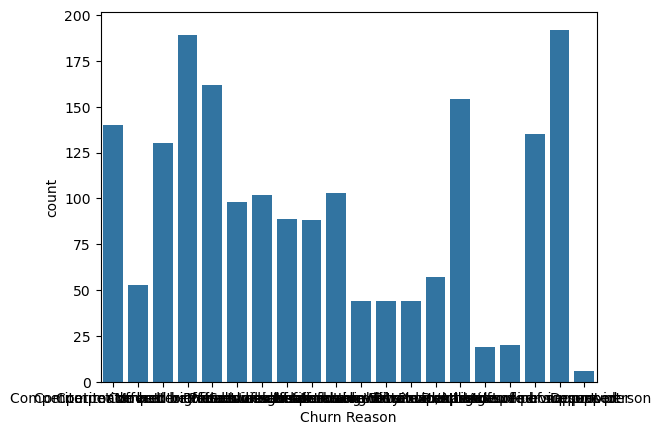

In [19]:
# Visualise
sns.countplot(data=df, x='Churn Reason')
plt.show()

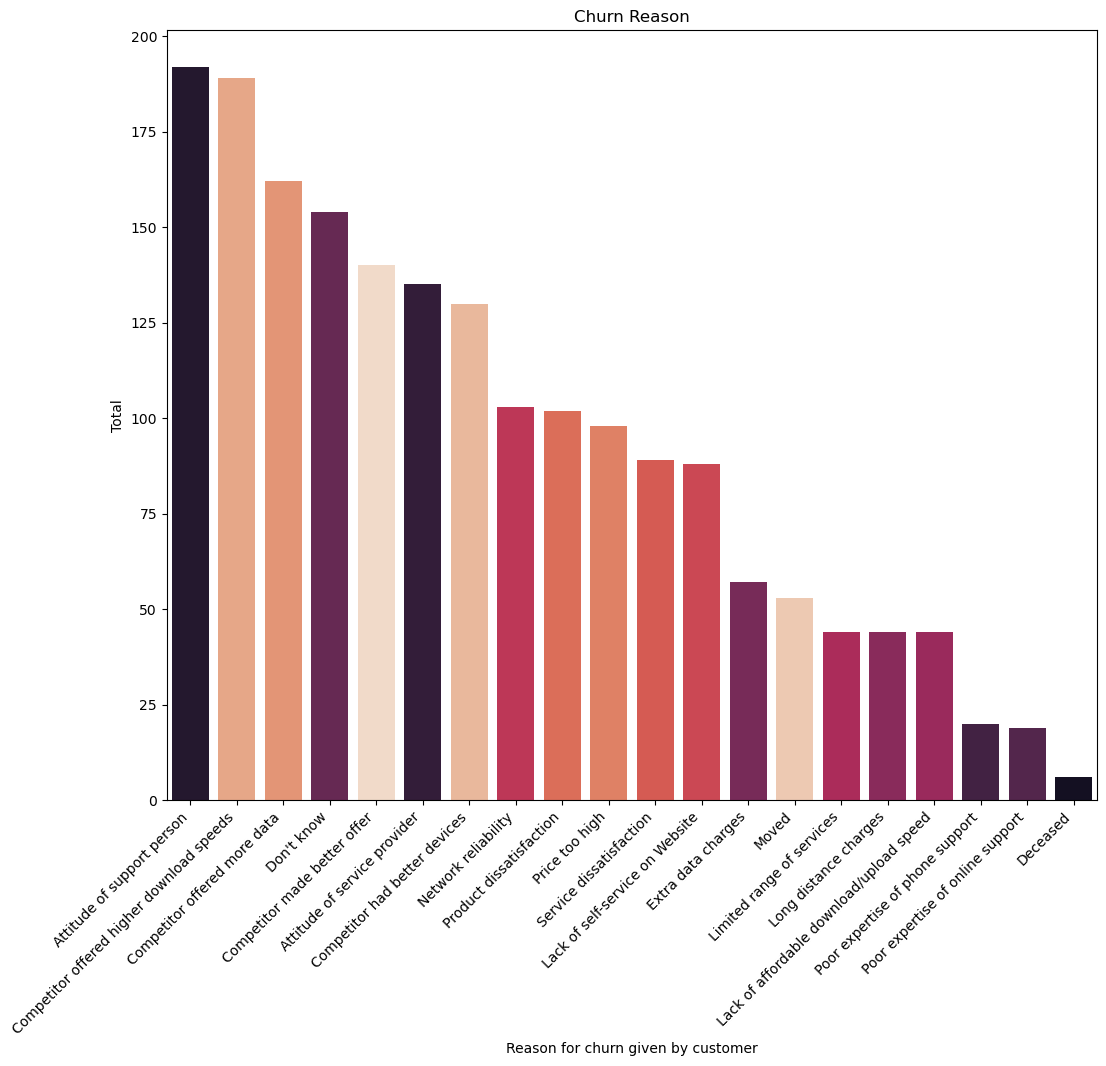

In [20]:
# Better visualisation

#sort from high to low
sort_desc = df.groupby('Churn Reason').size().sort_values().index[::-1]

#create chart
plt.figure(figsize=(12, 10))
churn_plot = sns.countplot(x='Churn Reason', data=df,
                                order=sort_desc,
                                hue = 'Churn Reason',
                                legend = False,
                                palette='rocket_r')

#specfiy axis labels
churn_plot.set(xlabel='Reason for churn given by customer',
               ylabel='Total',
               title='Churn Reason')

#rotate x-axis labels
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

There's a number of common reasons for churn, let's group them

In [21]:
# Mapping - categories: 1. Support staff issues , 2. Competitor with better deal , 3. Unknown, 4. Product Issues, 5. Pricing, 6. Moved, 7. Deceased

group_mapping = {
    'Attitude of support person': 'Support staff issues',
    'Competitor offered higher download speeds': 'Competitor with better deal',
    'Competitor offered more data': 'Competitor with better deal',
    "Don't know": "Unknown",
    'Competitor made better offer': 'Competitor with better deal',
    'Attitude of service provider': 'Support staff issues',
    'Network reliability': 'Product Issues',
    'Product dissatisfaction': 'Product Issues',
    'Price too high': 'Pricing',
    'Service dissatisfaction': 'Product Issues',
    'Lack of self-service on Website': 'Product Issues',
    'Extra data charges': 'Pricing',
    'Moved': 'Moved',
    'Limited range of services': 'Product Issues',
    'Long distance charges': 'Pricing',
    'Lack of affordable download/upload speed': 'Pricing',
    'Poor expertise of phone support': 'Support staff issues',
    'Poor expertise of online support': 'Support staff issues',
    'Deceased': 'Deceased'
}

In [22]:
df1 = df.copy()

In [23]:
df1['Churn Group'] = df1['Churn Reason'].map(group_mapping)

In [24]:
grouped = df1['Churn Group'].value_counts().index

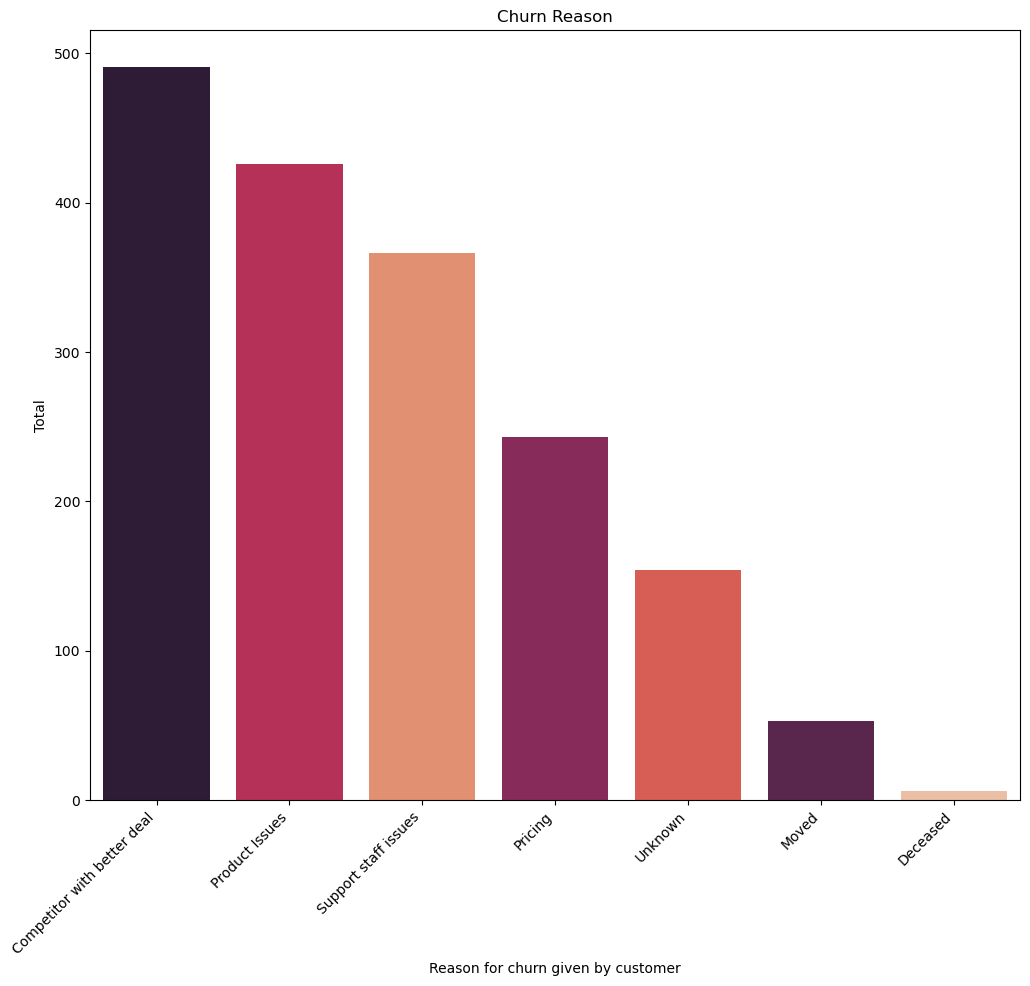

In [25]:
# Visualising new groups

# Create plot
plt.figure(figsize=(12, 10))
churn_group_plot = sns.countplot(x='Churn Group', data=df1,
                                order=grouped,
                                hue = 'Churn Group',
                                legend = False,
                                palette='rocket')

# Specfiy axis labels
churn_group_plot.set(xlabel='Reason for churn given by customer',
               ylabel='Total',
               title='Churn Reason')

# Rotate x-axis labels
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## 2.3 Characteristics of Churners

### Geography (City)

Is the geography of the customer a factor in deciding whether they churn or not?

<div style="text-align: center;">
    <h4>Active Customers</h4>
<p style="text-align:center;">
<img src="https://github.com/mikhailbelsky/Swansong-/blob/main/Screenshot_2024-12-17_at_13.50.47.png?raw=true"
     alt="ACtive Customers"
     style="float: center; margin-right: 10px;" />
</p>

<div style="text-align: center;">
    <h4>Churned Customers</h4>
<p style="text-align:center;">
<img src="https://github.com/mikhailbelsky/Swansong-/blob/main/Screenshot_2024-12-17_at_13.49.20.png?raw=true"
     alt="Churned Customers"
     style="float: center; margin-right: 10px;" />
</p>

It looks like there is no correlation between the location of the customer and the churn, as there is significant overlap between active and churned customers

There is clustering of customers in population centers (e.g. Los Angeles, San Diego, San Francisco, Sacramento), meaning that location-based variables (City or Zip Code) could lead to our model being able to generalise less well, if included in a model

### Gender

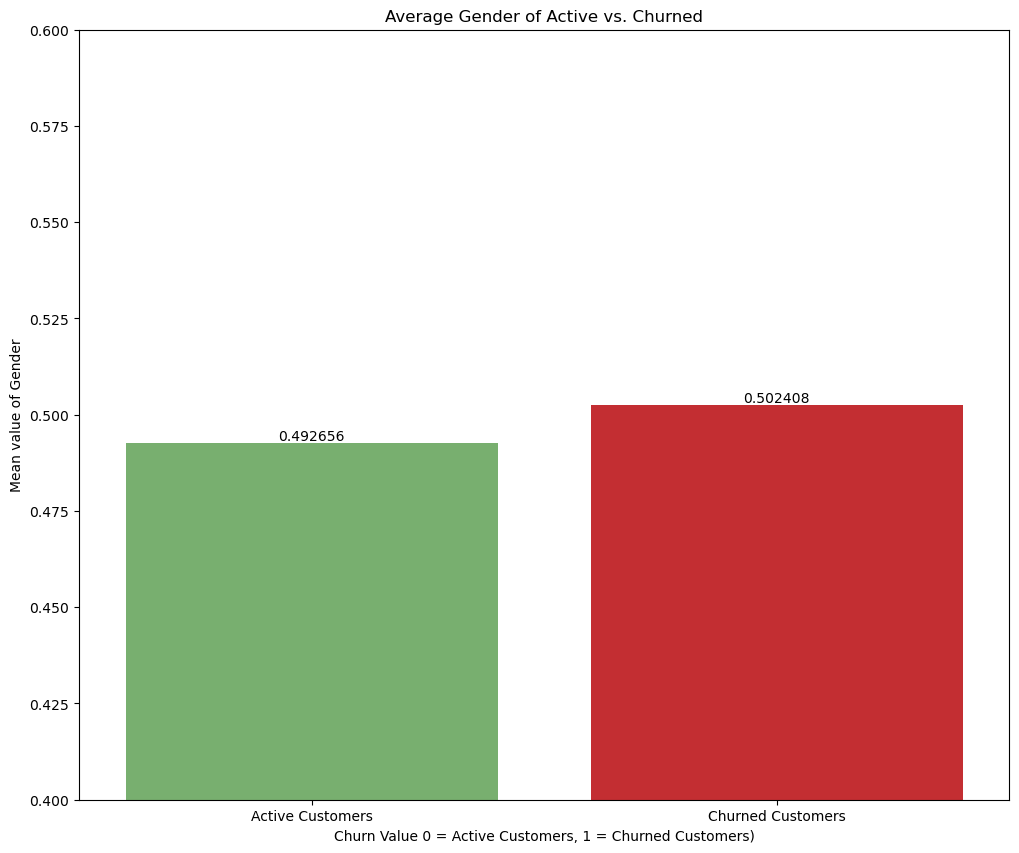

In [26]:
# Convert Gender to numeric
df1['Gender_Numeric'] = df1['Gender'].map({'Male': 0, 'Female': 1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_gender = df1.groupby('Churn Value')['Gender_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
gender_plot = sns.barplot(x = 'Churn Value',
                          y = 'Gender_Numeric',
                          data = mean_gender,
                          hue = 'Churn Value',
                          legend = False,
                          palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Gender of Active vs. Churned')
plt.xlabel('Churn Value 0 = Active Customers, 1 = Churned Customers)')
plt.ylabel('Mean value of Gender')
plt.ylim(0.4, 0.6) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

for i in gender_plot.containers: # source https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
    gender_plot.bar_label(i,)

plt.show()

In our dataset, 0 represents female, and 1 male, meaning that, from the above chart, Churned Customers are (slightly) more likely to be male than female. As this variable does not seem to matter to much in terms of skew one way or the other, as well as the potential ethical bias it could impart, we will likely exclude it from our analysis

### Age (Senior Citizen)

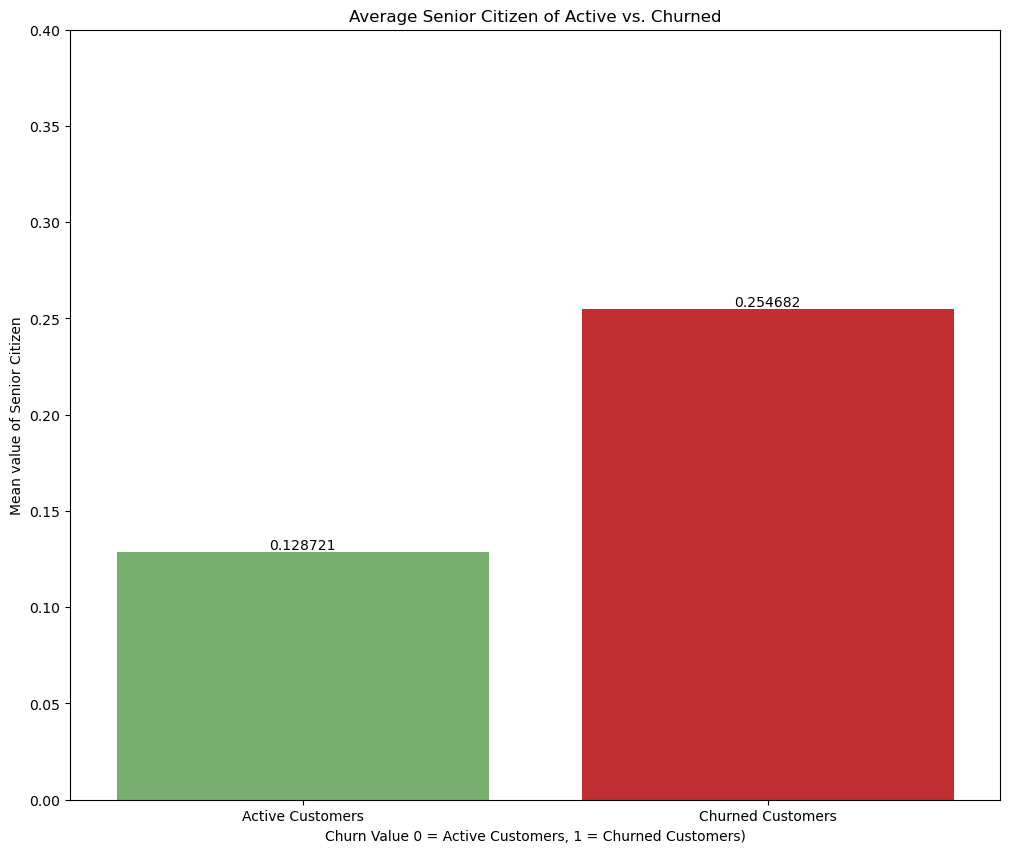

In [27]:
# Map Senior Citizen to numeric
df1['Senior_Numeric'] = df1['Senior Citizen'].map({'No':0, 'Yes':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_age = df1.groupby('Churn Value')['Senior_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x = 'Churn Value',
                       y = 'Senior_Numeric',
                       data = mean_age,
                       hue = 'Churn Value',
                       legend = False,
                       palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Senior Citizen of Active vs. Churned')
plt.xlabel('Churn Value 0 = Active Customers, 1 = Churned Customers)')
plt.ylabel('Mean value of Senior Citizen')
plt.ylim(0, .4) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in age_plot.containers:
    age_plot.bar_label(i,)

plt.show()

The average value of Churned Customers for Senior Citizen is much higher than for Active Customers, indicating that older customers could be more likely to churn. Nonetheless, both values have a low mean, indicating that there could be a relatively small number of senior citizens as part of the overall customers  

In [28]:
df1['Senior Citizen'].value_counts()

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Still a decent amount of customers are senior citizens, indicating that using this variable could be helpful to the model

### Relationship Status (Partner) 

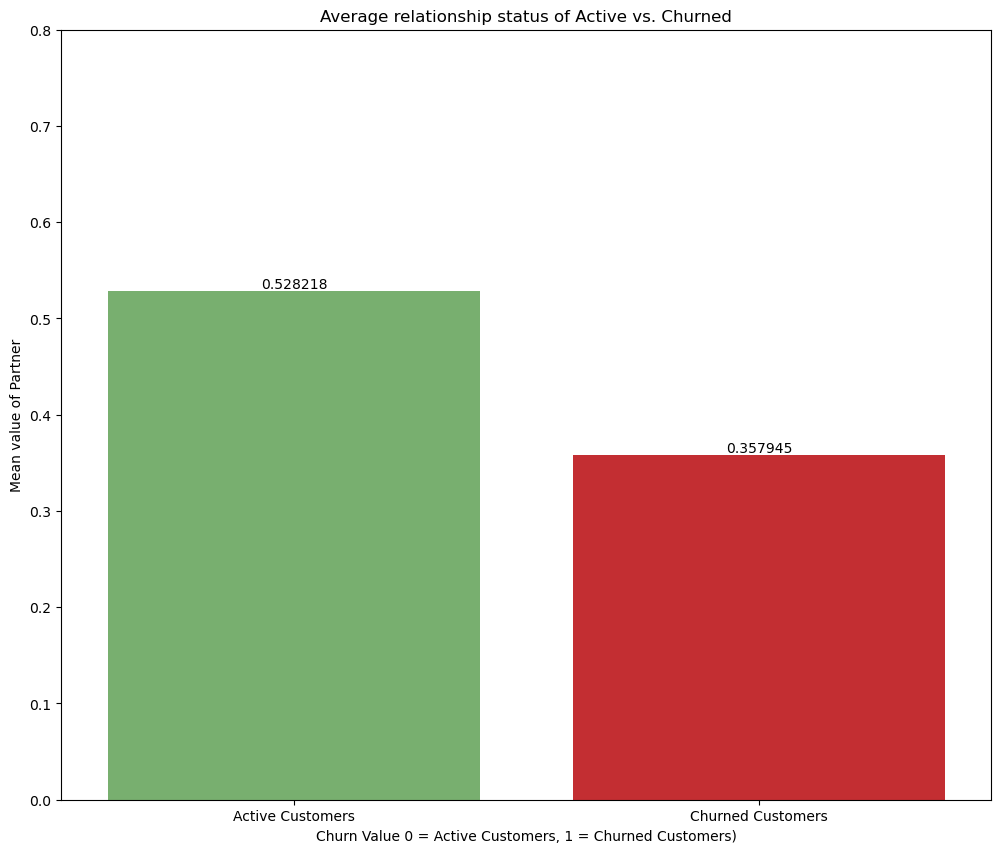

In [29]:
# Map Partner to numeric
df1['Partner_Numeric'] = df1['Partner'].map({'No':0, 'Yes':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_partner = df1.groupby('Churn Value')['Partner_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
partner_plot = sns.barplot(x = 'Churn Value',
                           y = 'Partner_Numeric',
                           data = mean_partner,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average relationship status of Active vs. Churned')
plt.xlabel('Churn Value 0 = Active Customers, 1 = Churned Customers)')
plt.ylabel('Mean value of Partner')
plt.ylim(0, .8) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in partner_plot.containers:
    partner_plot.bar_label(i,)
    
plt.show()

The data indicates that our active customers are more likely to have a partner, and could be a useful predictor

### Dependents

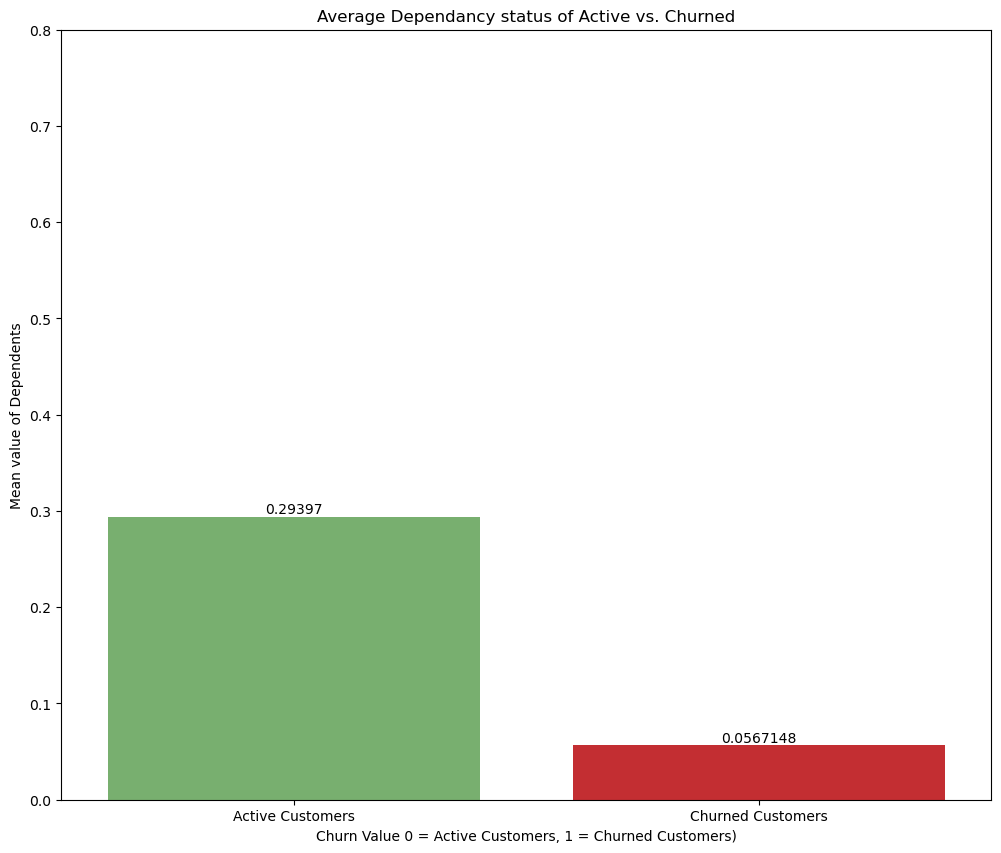

In [30]:
# Map Dependents to numeric
df1['Dependents_Numeric'] = df1['Dependents'].map({'No':0, 'Yes':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_dependents = df1.groupby('Churn Value')['Dependents_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
dependents_plot = sns.barplot(x = 'Churn Value',
                           y = 'Dependents_Numeric',
                           data = mean_dependents,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Dependancy status of Active vs. Churned')
plt.xlabel('Churn Value 0 = Active Customers, 1 = Churned Customers)')
plt.ylabel('Mean value of Dependents')
plt.ylim(0, .8) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in dependents_plot.containers:
    dependents_plot.bar_label(i,)
    
plt.show()

Active customers are much more likely to have dependents than churned customers, which seems to go hand in hand with the idea that active customers also have a partner.
From this we could conclude that the active customer profile is more likely to be in a relationship and have children, indicating larger households, whereas churned customers are likely to form smaller households 

### Tenure Months

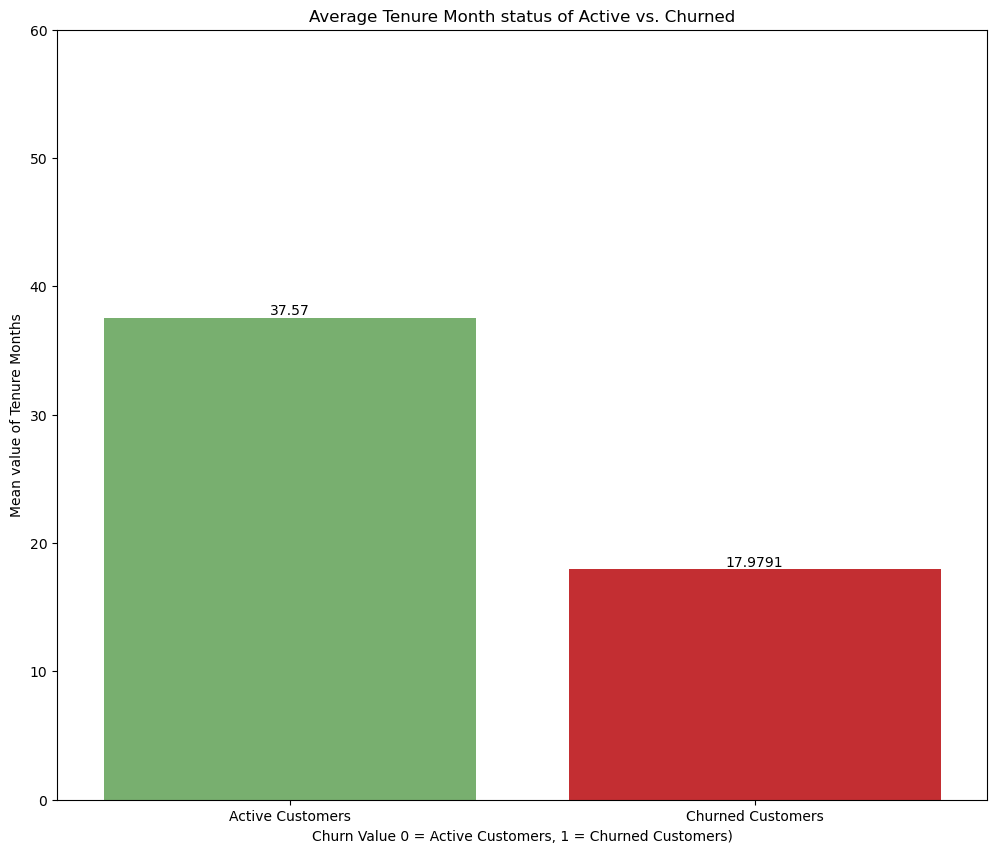

In [31]:
# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_t_months = df1.groupby('Churn Value')['Tenure Months'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
tenure_plot = sns.barplot(x = 'Churn Value',
                           y = 'Tenure Months',
                           data = mean_t_months,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Tenure Month status of Active vs. Churned')
plt.xlabel('Churn Value 0 = Active Customers, 1 = Churned Customers)')
plt.ylabel('Mean value of Tenure Months')
plt.ylim(0, 60) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in tenure_plot.containers:
    tenure_plot.bar_label(i,)
    
plt.show()

There seems to be a big difference in terms of the tenure months of our two types of customers. Active Customers tend to be stick around for a lot longer than Churned Customers, indicating a level of loyalty. Considering the significant difference between the two means (a year and a half), this could be an important factor in our modelling work

### Contract type (Contract)

In [32]:
df1.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

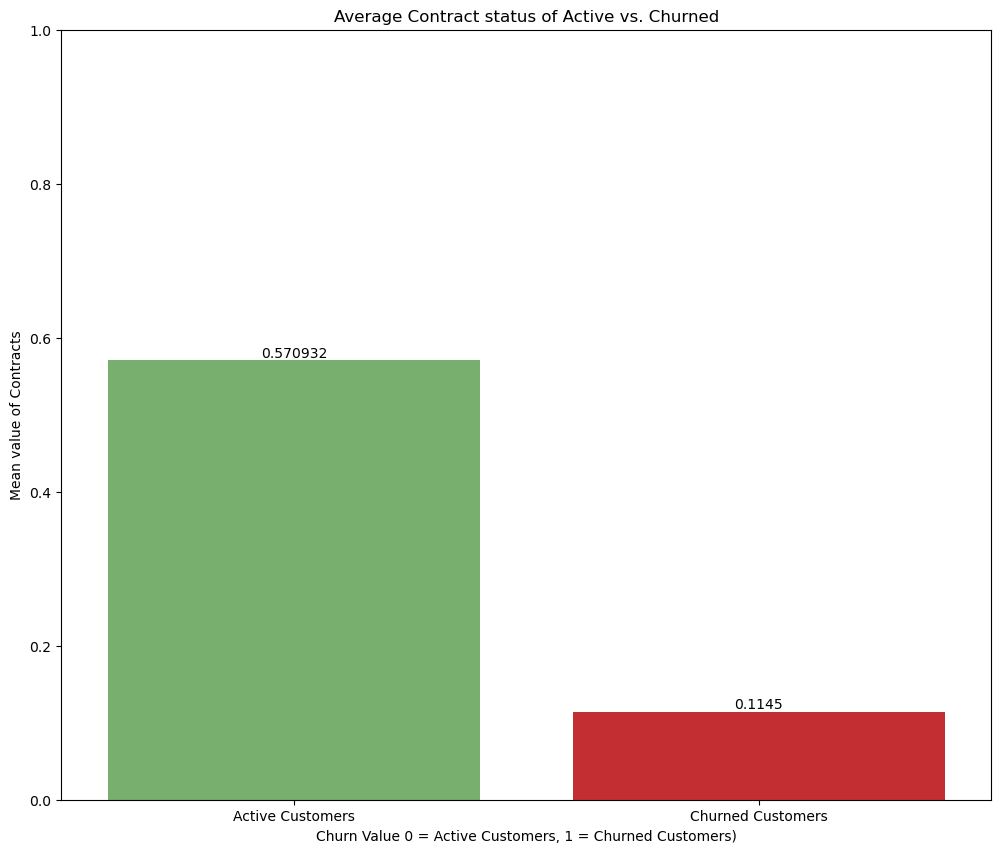

In [33]:
# Group Contract to two categories: Month-to-month and Year+ 
contract_grouping = {'Month-to-month': 'Month-to-month', 
                    'One year': 'Year+', 
                    'Two year': 'Year+'}

df1['Contract_Grouped'] = df1['Contract'].map(contract_grouping)

# Map Dependents to numeric
df1['Contract_Numeric'] = df1['Contract_Grouped'].map({'Month-to-month':0, 'Year+':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_contract = df1.groupby('Churn Value')['Contract_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
contract_plot = sns.barplot(x = 'Churn Value',
                           y = 'Contract_Numeric',
                           data = mean_contract,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Contract status of Active vs. Churned')
plt.xlabel('Churn Value 0 = Active Customers, 1 = Churned Customers)')
plt.ylabel('Mean value of Contracts')
plt.ylim(0, 1) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in contract_plot.containers:
    contract_plot.bar_label(i,)
    
plt.show()

There's a very marked difference between our two customer types based on the type of contract they have. Churned customers are siginficantly more likely to have shorter contracts than active customers, indicating this could be an important variable in our modelling. It also fits with the previous comparison of tenure months: active customers have a much higher tenure length than churned customers

### Monthly Charges

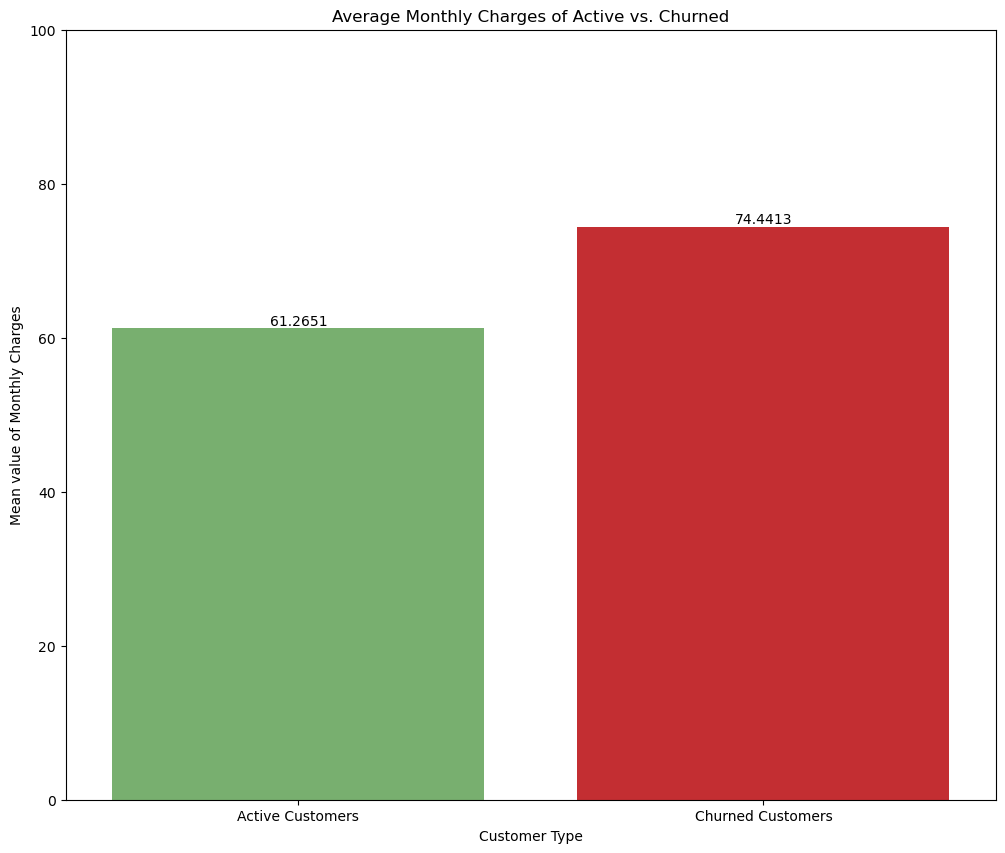

In [34]:
# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_m_charges = df1.groupby('Churn Value')['Monthly Charges'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
m_charges_plot = sns.barplot(x = 'Churn Value',
                           y = 'Monthly Charges',
                           data = mean_m_charges,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Monthly Charges of Active vs. Churned')
plt.xlabel('Customer Type')
plt.ylabel('Mean value of Monthly Charges')
plt.ylim(0, 100) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in m_charges_plot.containers:
    m_charges_plot.bar_label(i,)
    
plt.show()

The monthly charges for churned customers are higher than those for active customers, incidicating they are paying more for services than active customers. If customers are price sensitive, this could indicate a price issue between the two groups, implying that a good way of retaining customers could be by offering discounts for becoming a long-term customer

### Total Charges

In [35]:
empty_objects = df1['Total Charges'].apply(lambda x: x == ' ' or x == " ")
empty_objects.sum()

11

In [36]:
df1['Total Charges'] = pd.to_numeric(df1['Total Charges'], errors='coerce')  # Ensure 'Total Charges' is numeric
df2 = df1.dropna(subset=['Total Charges'])  # Drop rows with missing 'Total Charges'

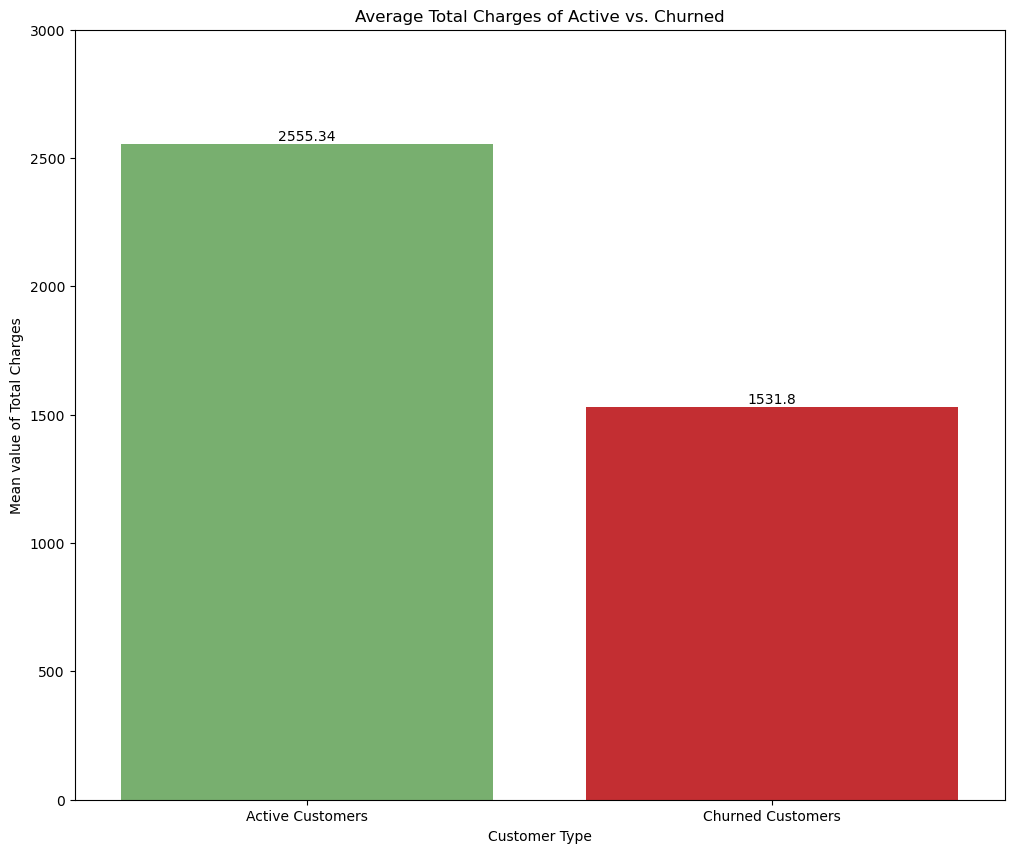

In [37]:
# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_t_charges = df2.groupby('Churn Value')['Total Charges'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
t_charges_plot = sns.barplot(x = 'Churn Value',
                           y = 'Total Charges',
                           data = mean_t_charges,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Total Charges of Active vs. Churned')
plt.xlabel('Customer Type')
plt.ylabel('Mean value of Total Charges')
plt.ylim(0, 3000) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in t_charges_plot.containers:
    t_charges_plot.bar_label(i,)
    
plt.show()

Total charges for active customers are higher than for churned customers, which is sensible considering that active customers are also customers for longer according to tenure months

### Phone Service

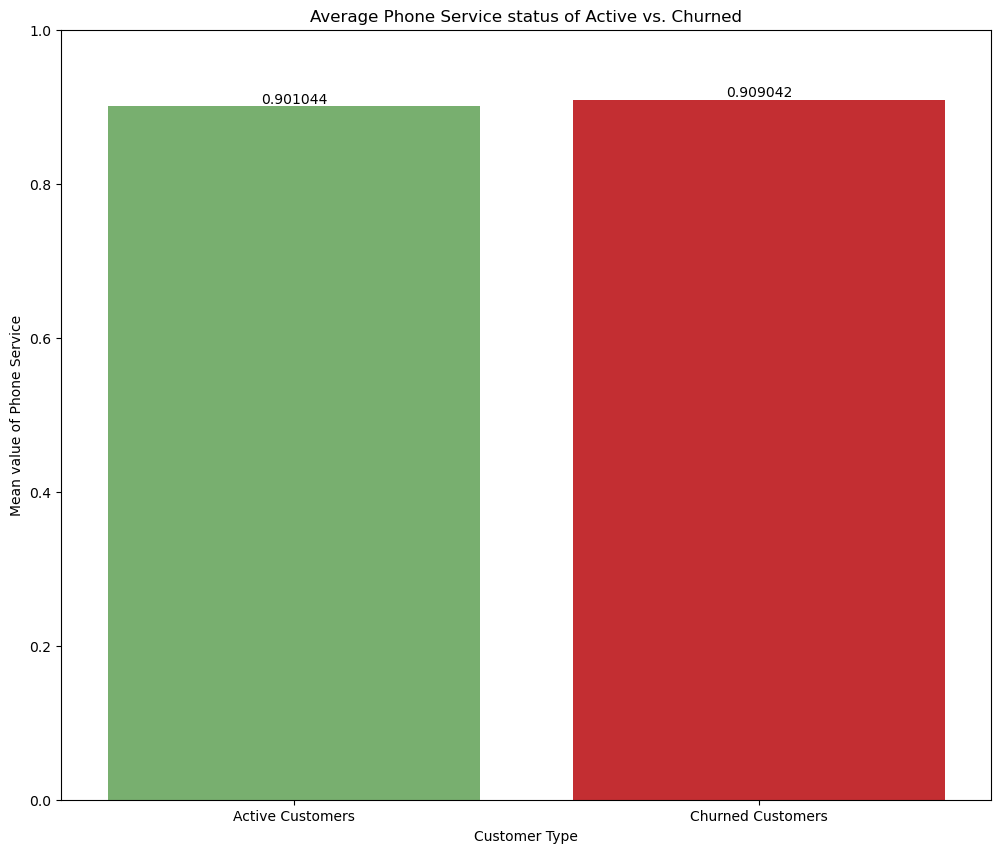

In [38]:
# Map Phone Service to numeric
df1['Phone_Numeric'] = df1['Phone Service'].map({'No':0, 'Yes':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_phone = df1.groupby('Churn Value')['Phone_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
phone_plot = sns.barplot(x = 'Churn Value',
                           y = 'Phone_Numeric',
                           data = mean_phone,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Phone Service status of Active vs. Churned')
plt.xlabel('Customer Type')
plt.ylabel('Mean value of Phone Service')
plt.ylim(0, 1) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in phone_plot.containers:
    phone_plot.bar_label(i,)
    
plt.show()

There seems to be very little difference between whether a customer type has phone service or not - it does not seem to be an important variable

### Multiple Lines

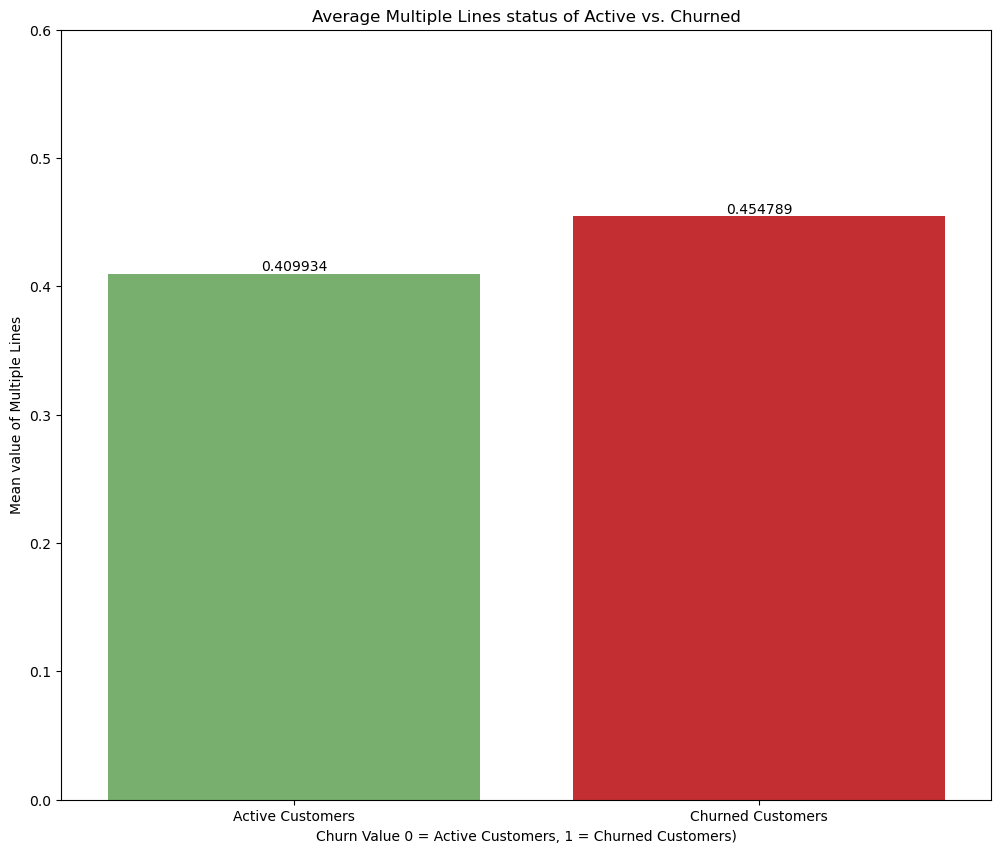

In [39]:
# Group Multiple Lines to two categories: No and Yes 
lines_grouping = {'No': 'No', 
                  'Yes': 'Yes', 
                  'No phone service': 'No'}

df1['Lines_Grouped'] = df1['Multiple Lines'].map(lines_grouping)

# Map to numeric
df1['Lines_Numeric'] = df1['Lines_Grouped'].map({'No':0, 'Yes':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_lines = df1.groupby('Churn Value')['Lines_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
lines_plot = sns.barplot(x = 'Churn Value',
                           y = 'Lines_Numeric',
                           data = mean_lines,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Multiple Lines status of Active vs. Churned')
plt.xlabel('Churn Value 0 = Active Customers, 1 = Churned Customers)')
plt.ylabel('Mean value of Multiple Lines')
plt.ylim(0, 0.6) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in lines_plot.containers:
    lines_plot.bar_label(i,)
    
plt.show()

Churned customers are slightly more likely to have multiple phone lines than active customers, indicating that this is not considered an imprortant variable - althoguh the difference is small

### Internet Service

In [40]:
df1['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

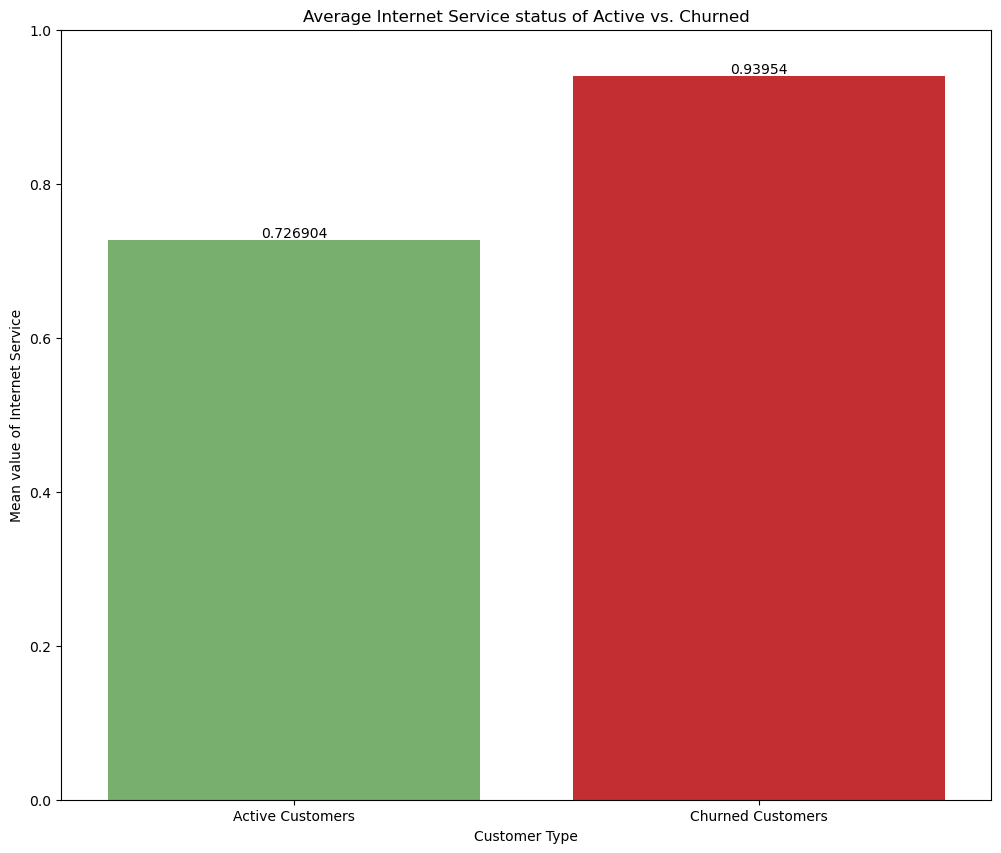

In [41]:
# Group Internet Service to two categories: No and Yes 
internet_grouping = {'Fiber optic': 'Yes', 
                  'DSL': 'Yes', 
                  'No': 'No'}

df1['Internet_Grouped'] = df1['Internet Service'].map(internet_grouping)

# Map to numeric
df1['Internet_Numeric'] = df1['Internet_Grouped'].map({'No':0, 'Yes':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_internet = df1.groupby('Churn Value')['Internet_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
internet_plot = sns.barplot(x = 'Churn Value',
                           y = 'Internet_Numeric',
                           data = mean_internet,
                           hue = 'Churn Value',
                           legend = False,
                           palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Internet Service status of Active vs. Churned')
plt.xlabel('Customer Type')
plt.ylabel('Mean value of Internet Service')
plt.ylim(0, 1) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in internet_plot.containers:
    internet_plot.bar_label(i,)
    
plt.show()

Churned customers are much more likely to have internet than active customers, indicating that customers who are less interested in having an internet connection, are more likely to be long-term customers

### Paperless Billing

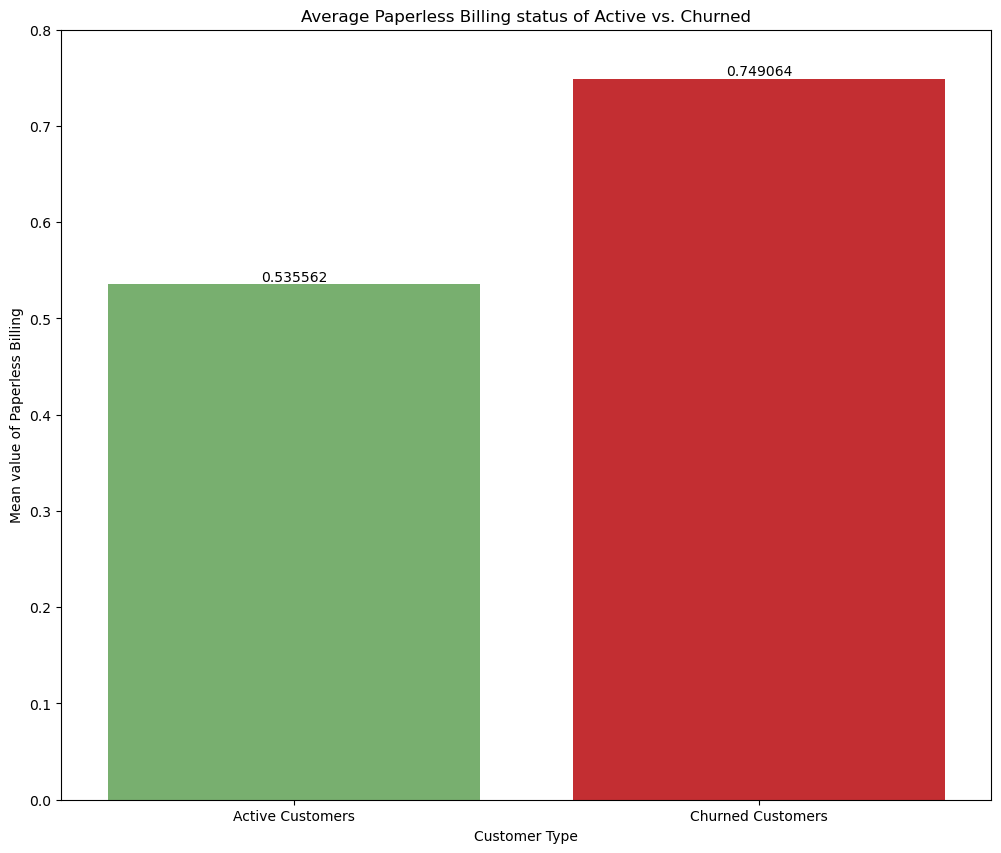

In [42]:
# Map Paperless billing to numeric
df1['Paperless_Numeric'] = df1['Paperless Billing'].map({'No':0, 'Yes':1})

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_paperless = df1.groupby('Churn Value')['Paperless_Numeric'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
paperless_plot = sns.barplot(x = 'Churn Value',
                             y = 'Paperless_Numeric',
                             data = mean_paperless,
                             hue = 'Churn Value',
                             legend = False,
                             palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Paperless Billing status of Active vs. Churned')
plt.xlabel('Customer Type')
plt.ylabel('Mean value of Paperless Billing')
plt.ylim(0, .8) 
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in paperless_plot.containers:
    paperless_plot.bar_label(i,)
    
plt.show()

Churned customers are much more likely to prefer paperless billing, which goes hand-in-hand with their preference for also having an internet service

### How many internet services?

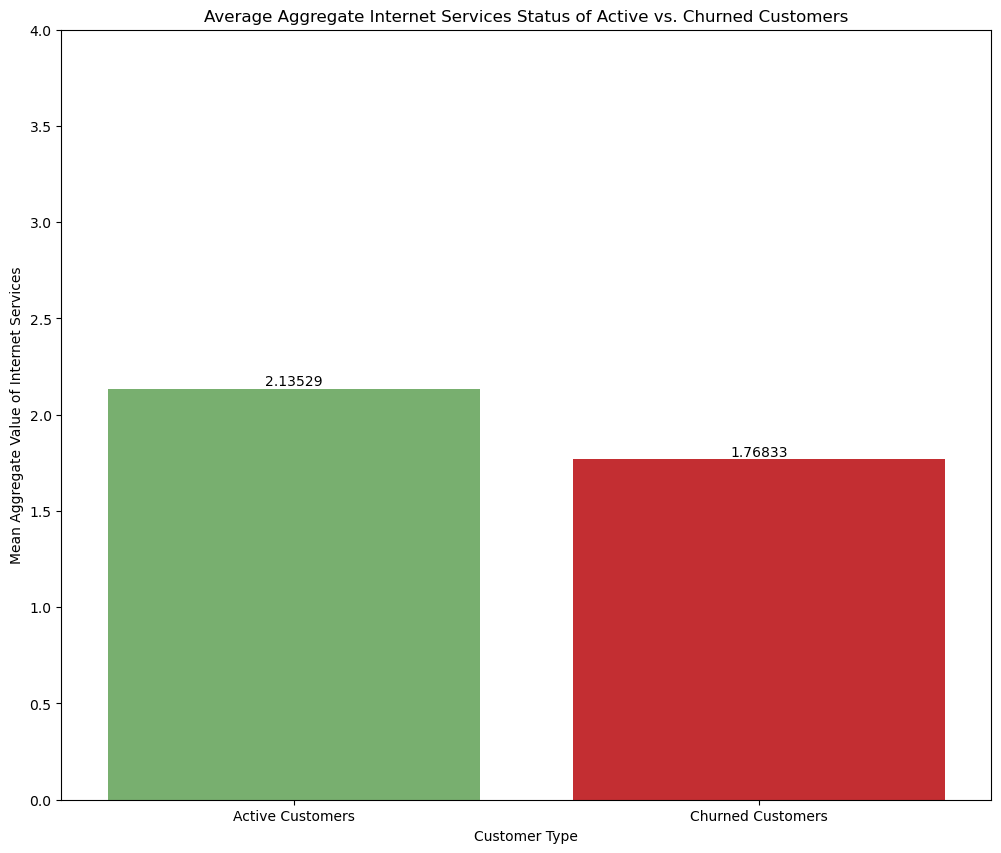

In [43]:
#  Grouping for internet services
internet_services_grouping = {'No': 0,
                              'Yes': 1, 
                              'No internet service': 0}

# List of variables that are internet services to aggregate
internet_service_columns = [
     'Online Security',
     'Online Backup',
     'Device Protection',
     'Tech Support',
     'Streaming TV',
     'Streaming Movies'
]

# Map each variable to numeric values
for col in internet_service_columns:
    df1[col] = df1[col].map(internet_services_grouping)

# Force variables to numeric
df1[internet_service_columns] = df1[internet_service_columns].apply(pd.to_numeric, errors='coerce')

# Create an aggregate variable by summing the numeric variables (i.e. max value is 6 as there are 6 variables)
df1['Aggregate_Internet_Services'] = df1[internet_service_columns].sum(axis=1)

# Group by Churned Value: 0 is Active Customer, 1 is Churned Customer
mean_internet_services = df1.groupby('Churn Value')['Aggregate_Internet_Services'].mean().reset_index()

# Plot figure
plt.figure(figsize=(12, 10))
internet_services_plot = sns.barplot(
    x='Churn Value',
    y='Aggregate_Internet_Services',
    data=mean_internet_services,
    hue='Churn Value',
    legend=False,
    palette=['#70ba64', '#dc151b'])

# Labels
plt.title('Average Aggregate Internet Services Status of Active vs. Churned Customers')
plt.xlabel('Customer Type')
plt.ylabel('Mean Aggregate Value of Internet Services')
plt.ylim(0, 4)
plt.xticks([0, 1], ['Active Customers', 'Churned Customers'])

# Add values for each column
for i in internet_services_plot.containers:
    internet_services_plot.bar_label(i)

plt.show()

In [44]:
df1['Aggregate_Internet_Services'].value_counts()

Aggregate_Internet_Services
0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: count, dtype: int64

Active customers seem more likely to have multiple internet services than churned customers, although not by a lot (max is 6)

# 3. Model 1: Decision Trees

## 3.1 DT: Feature Engineering

* To ensure equitable service provision and avoid gender-based bias, ```gender``` was not included as a predictor in the model.
* We also dropped columns that do not contribute much to the Decision Tree model.
* We also have 11 rows with empty ```Total Charges``` which we decided to drop rather than replace as it is only a small amount.
* We changed all Yes/No columns to binary 0 and 1 and we mapped any columns that have 3 unique values.
* We used this ```feature_eng_dt()``` function for only the Decicion Tree. Logistic Regression uses different features for its model.

In [45]:
# quick feature engineering

# Mapping columns to get binary results
def columns_binary(x):
    if x == 'Yes':
        return 1
    else:
        return 0


def feature_eng_dt(df):

    # Drop rows where 'Total Charges' is missing or empty
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # Ensure 'Total Charges' is numeric
    df = df.dropna(subset=['Total Charges'])  # Drop rows with missing 'Total Charges'


    # Drop non-useful columns
    df = df.drop(columns = ['CustomerID',
                            'Count',
                            'Country',
                            'Zip Code',
                            'State',
                            'Lat Long',
                            'Latitude',
                            'Longitude',
                            'Churn Label',
                            'Churn Reason',
                            'City'],
                            axis = 1) # We already have Churn Value which is already a numerical


    # Change yes/no(including: No internet/Phone services) to binary
    df['Senior Citizen'] = df['Senior Citizen'].apply(columns_binary)
    df['Partner'] = df['Partner'].apply(columns_binary)
    df['Dependents'] = df['Dependents'].apply(columns_binary)
    df['Phone Service'] = df['Phone Service'].apply(columns_binary)
    df['Paperless Billing'] = df['Paperless Billing'].apply(columns_binary)

    # Changing columns with only two results to numericals
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

    # Changing columns with 3 results to numericals
    df['Multiple Lines'] = df['Multiple Lines'].map({'No':0, 'Yes':1, 'No phone service':2})
    df['Online Security'] = df['Online Security'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Device Protection'] = df['Device Protection'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Online Backup'] = df['Online Backup'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Tech Support'] = df['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Streaming TV'] = df['Streaming TV'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Streaming Movies'] = df['Streaming Movies'].map({'No':0, 'Yes':1, 'No internet service':2})

    # Other 3
    df['Internet Service'] = df['Internet Service'].map({'DSL':0, 'Fiber optic':1, 'No':2})
    df['Contract'] = df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
    df['Payment Method'] = df['Payment Method'].map({'Mailed check':0, 'Electronic check':1, 'Bank transfer (automatic)':2,
                                                     'Credit card (automatic)':3})
    return df

In [46]:
# Apply the feature_eng() function to out dataframe

featured_df_dt = feature_eng_dt(df)

In [47]:
# Check it worked, and have a look at the changes

featured_df_dt.describe()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.230375,32.421786,0.903299,0.615330,0.872582,0.718857,0.777162,0.776166,0.722412,0.816695,0.820677,0.688567,0.592719,1.423777,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.421103,24.545260,0.295571,0.655867,0.737271,0.796556,0.778188,0.778542,0.795571,0.762952,0.761287,0.832934,0.491363,1.064493,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


## 3.2 DT: Models

### 3.2a DT: Single Decision Tree

In [48]:
# Initialising the Decision Tree

dt = DecisionTreeClassifier(max_depth=4, random_state=99)

In [49]:
# Define feature columns for our predictions
# We decided on these features specifically by looking at the correlations between them and the target.

feature_cols = [
                'Contract',
                'Tenure Months',
                'Online Security',
                'Tech Support',
                'Senior Citizen', 
                'Partner', 
                'Dependents',
                'Phone Service', 
                'Multiple Lines', 
                'Internet Service',
                'Online Backup',
                'Device Protection',
                'Streaming TV', 
                'Streaming Movies', 
                'Paperless Billing',
                'Payment Method', 
                'Monthly Charges', 
                'Total Charges'
               ]


## Test - splitting
X_train, X_test, y_train, y_test = train_test_split(featured_df_dt[feature_cols],
                                                   featured_df_dt['Churn Value'],
                                                   test_size = 0.3,
                                                   random_state = 99,
                                                   stratify = featured_df_dt['Churn Value'])  # We stratify based on the target so we have an even ratio of churned vs active

## SCALING 
columns_to_scale = ['Monthly Charges', 'Total Charges']
scaler = MinMaxScaler()                                                      # Minmax scaler used to scale values between 0 and 1
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])  # Fit the scaler onto the columns

In [50]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=99)

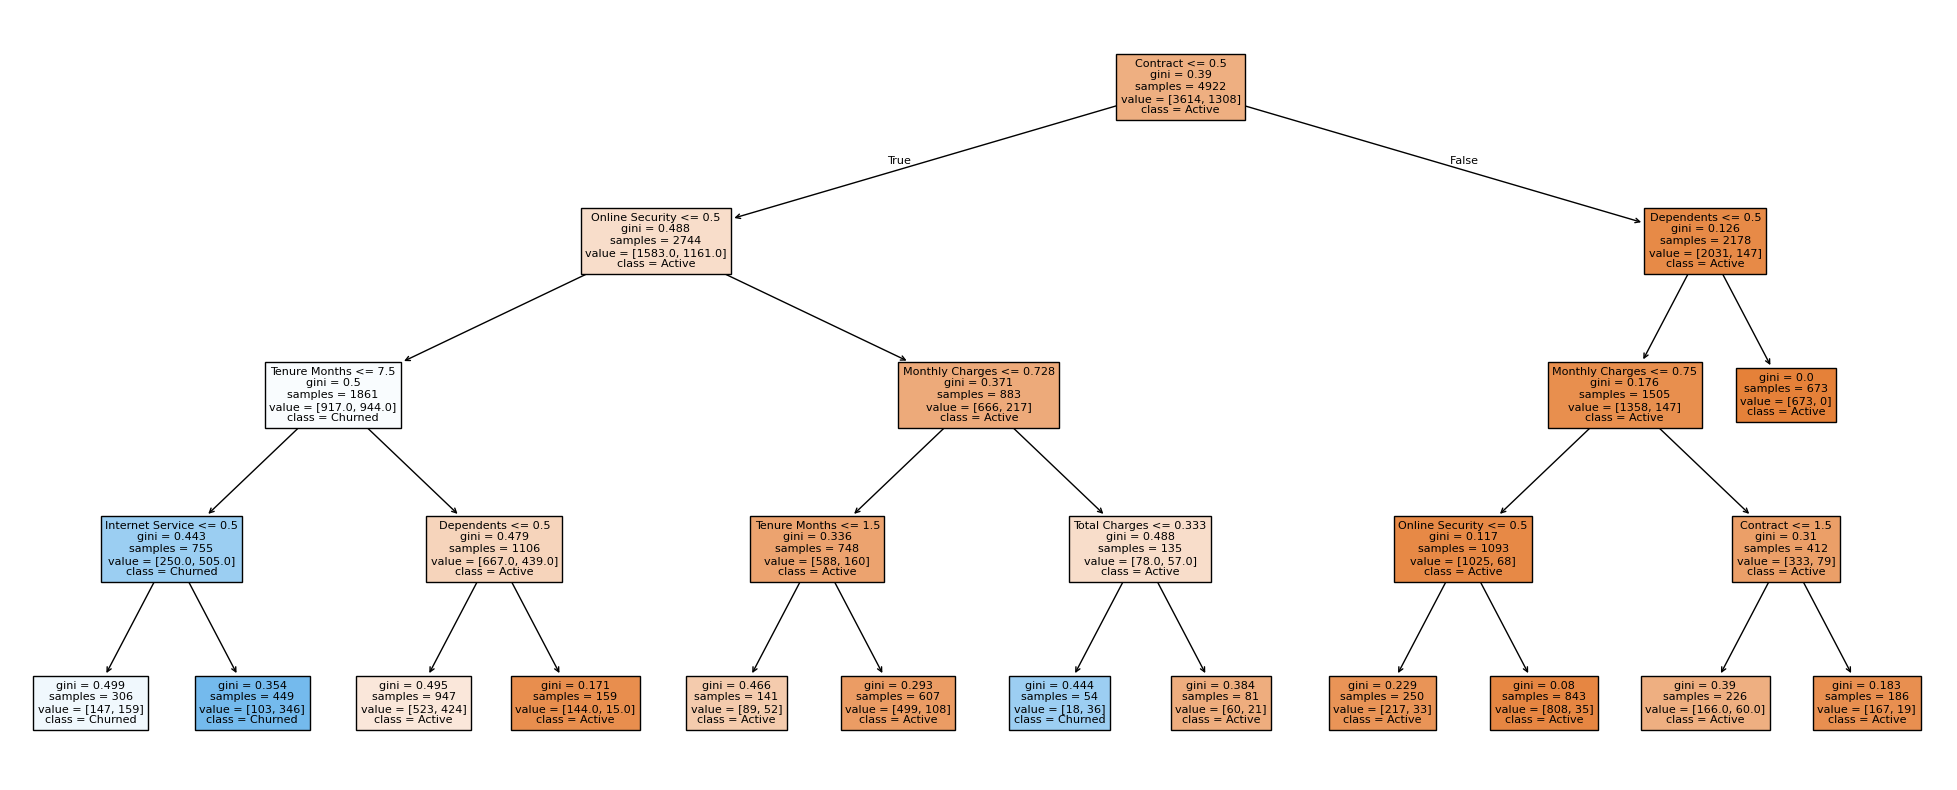

In [51]:
# Plot out Decition Tree

fig = plt.figure(figsize=(25,10))
thing = tree.plot_tree(dt,
                      feature_names = feature_cols,
                      class_names=['Active', 'Churned'],
                      filled=True)

In [52]:
# Check out the scores


print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.7897196261682243
Score on testing set: 0.7701421800947867


In [53]:
# Prepare a DataFrame to compare actual vs predicted values and predicted probabilities

train_results_dt = X_train.copy()                              # Make a copy of the training features
train_results_dt['y_pred'] = dt.predict(X_train)               # Add predicted labels
train_results_dt['y_real'] = y_train                           # Add actual target values
train_results_dt['y_prob'] = dt.predict_proba(X_train)[:,1]    # Add predicted probabilities for the positive class

In [54]:
# Evaluate the model's performance (Accuracy, Precision, and Recall ) using our custom apr() function we defined at the start

apr(train_results_dt['y_pred'], train_results_dt['y_real'])

Accuracy:0.7897196261682243
Precision:0.6687268232385661
Recall:0.4136085626911315
F1:0.5111006140765234


(0.7897196261682243,
 0.6687268232385661,
 0.4136085626911315,
 0.5111006140765234)

In [55]:
# Calculate the importance of each feature in the decision tree model
importance = list(zip(feature_cols, list(dt.feature_importances_))) 

# Sort the DataFrame by the importance scores in descending order and display the top 10 features.
pd.DataFrame(importance, columns=('Feature', 'Prob')).sort_values(by = 'Prob', ascending = False).head(10)

,Feature,Prob
0,Contract,0.549445
2,Online Security,0.149533
1,Tenure Months,0.131329
6,Dependents,0.075377
9,Internet Service,0.040308
16,Monthly Charges,0.035101
17,Total Charges,0.018908
5,Partner,0.000000
4,Senior Citizen,0.000000
7,Phone Service,0.000000


Test accuracy =  0.7897196261682243


0.7897196261682243

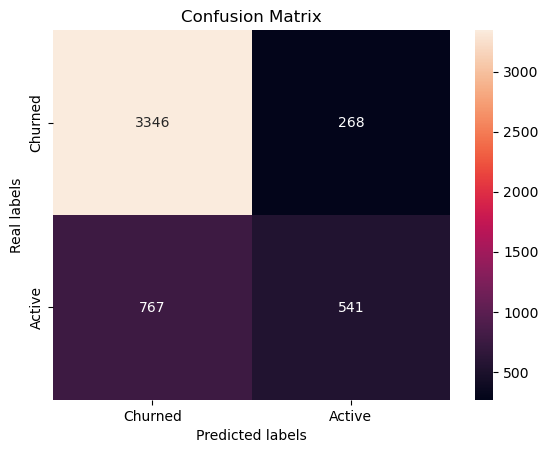

In [56]:
# Produce a confusion matrix for the classification model

produce_confusion('Active', 'Churned', 'binary', train_results_dt, 'y_pred', 'y_real')

### 3.2b DT: GridSearchCV

In [57]:
# Perform hyperparameter tuning for a Decision Tree using GridSearchCV

grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state=99), # I want to use a decision tree
                    param_grid = {'max_depth': [3, 5, 7, 10],
                                  'min_samples_split': [5, 10, 15, 20, 50, 100],
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                                  'max_features':[2,5]},
                    cv = 10,                    # Use 10-fold cross-validation, splitting the dataset into 10 parts for training and testing
                    refit = True,               # Automatically refit the model on the best combination of parameters after grid search
                    verbose = 1,                # Print detailed output during the grid search process (higher value = more output)
                    scoring = 'accuracy')       # Use accuracy as the metric to evaluate model performance for each parameter set

In [58]:
# Perform the grid search to find the best hyperparameters for the Decision Tree model

grid.fit(X_train, y_train)
gs = grid.best_estimator_
gs.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(max_depth=7, max_features=2, min_samples_leaf=5,
                       min_samples_split=15, random_state=99)

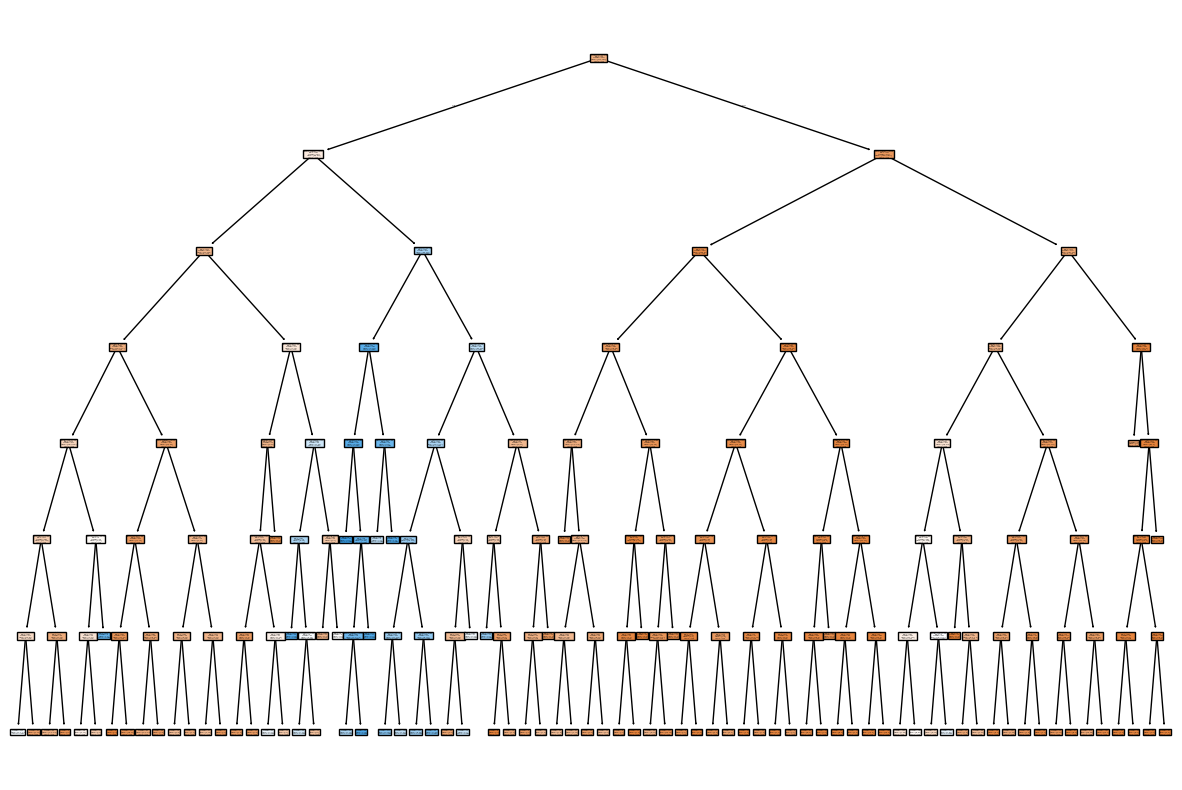

In [59]:
# Visualize the Decision Tree using the new BEST parameters

fig = plt.figure(figsize=(15,10))
thing = tree.plot_tree(gs,
                      feature_names = feature_cols,
                      class_names=['Active', 'Churned'],
                      filled=True) 

In [60]:
# Evaluate model again
# We can see, it has not performed well but it will still be useful to see which feastures it ranks as important

print(f'Score on training set: {gs.score(X_train, y_train)}')
print(f'Score on testing set: {gs.score(X_test, y_test)}')

Score on training set: 0.804754164973588
Score on testing set: 0.7417061611374408


In [61]:
# Prepare a DataFrame to compare actual vs predicted values and predicted probabilities

train_results_gs = X_train.copy()
train_results_gs['y_pred'] = gs.predict(X_train)
train_results_gs['y_real'] = y_train
train_results_gs['y_prob'] = gs.predict_proba(X_train)[:,1]

In [62]:
# Calculate the importance of each feature in the decision tree model with GridSearchCV
importance = list(zip(feature_cols, list(gs.feature_importances_)))

# Sort the DataFrame by the importance scores in descending order and display the top 10 features.
pd.DataFrame(importance, columns=('Feature', 'Prob')).sort_values(by = 'Prob', ascending = False).head(10)

,Feature,Prob
1,Tenure Months,0.382655
16,Monthly Charges,0.257288
0,Contract,0.106541
6,Dependents,0.089450
10,Online Backup,0.029212
8,Multiple Lines,0.022975
2,Online Security,0.021848
14,Paperless Billing,0.018364
3,Tech Support,0.016797
17,Total Charges,0.016482


Test accuracy =  0.804754164973588


0.804754164973588

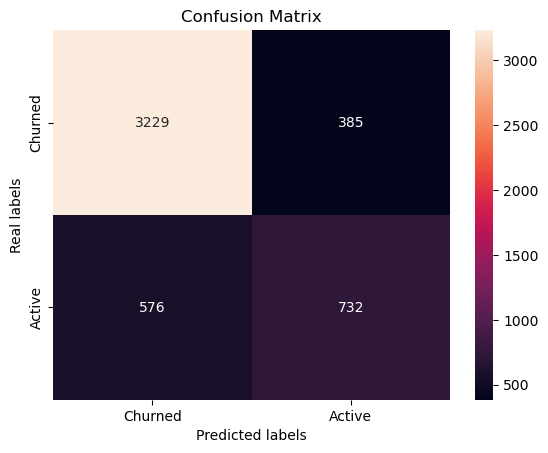

In [63]:
# Produce a confusion matrix for the classification model and GridSearchCV

produce_confusion('Active', 'Churned', 'binary', train_results_gs, 'y_pred', 'y_real')

### 3.2c DT: Random Forests

In [64]:
# Create a grid search object for RandomForest

grid2 = GridSearchCV(estimator = RandomForestClassifier(random_state=99),
                  param_grid = {'n_estimators': [100],
                                'max_depth': [3, 10],
                                'min_samples_split': [50],
                                'min_samples_leaf': [10, 20],
                                'max_features':[2, 5]},
                  cv=5,
                  verbose = 1,
                  refit = True,
                  scoring = 'accuracy')

In [65]:
# Fit grid search on the training set
grid2.fit(X_train, y_train)

# Save my best model as a random forest model
rf = grid2.best_estimator_

rf.fit(X_train, y_train)

# Evaluate model
print(f'Score on training set: {rf.score(X_train, y_train)}')
print(f'Score on testing set: {rf.score(X_test, y_test)}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score on training set: 0.819585534335636
Score on testing set: 0.7872037914691943


In [66]:
# Calculate the importance of each feature in the decision tree model
importance = list(zip(feature_cols, list(rf.feature_importances_)))

# Sort the DataFrame by the importance scores in descending order and display the top 10 features.
pd.DataFrame(importance, columns=('Feature', 'Prob')).sort_values(by = 'Prob', ascending = False).head(10)

,Feature,Prob
1,Tenure Months,0.171292
0,Contract,0.133345
2,Online Security,0.106761
17,Total Charges,0.099598
3,Tech Support,0.099080
16,Monthly Charges,0.065106
6,Dependents,0.060195
9,Internet Service,0.052620
11,Device Protection,0.043550
10,Online Backup,0.038505


### 3.2d DT: Extra Trees

In [67]:
# Create a grid search object for ExtraTrees

grid3 = GridSearchCV(estimator = ExtraTreesClassifier(random_state=99),
                  param_grid = {'n_estimators': [100],
                                'max_depth': [3, 10],
                                'min_samples_split': [50],
                                'min_samples_leaf': [10, 20],
                                'max_features':[2, 5]},
                  cv=5,
                  verbose = 1,
                  refit = True,
                  scoring = 'accuracy')

In [68]:
grid3.fit(X_train, y_train)
et = grid3.best_estimator_
et.fit(X_train, y_train)

# Evaluate model.
print(f'Score on training set: {et.score(X_train, y_train)}')
print(f'Score on testing set: {et.score(X_test, y_test)}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score on training set: 0.8236489232019504
Score on testing set: 0.79478672985782


In [69]:
importance = list(zip(feature_cols, list(et.feature_importances_)))
pd.DataFrame(importance, columns=('Feature', 'Prob')).sort_values(by = 'Prob', ascending = False).head(10)

,Feature,Prob
0,Contract,0.223993
1,Tenure Months,0.152620
2,Online Security,0.107582
6,Dependents,0.100534
3,Tech Support,0.091884
9,Internet Service,0.070625
10,Online Backup,0.055337
17,Total Charges,0.046806
11,Device Protection,0.030090
14,Paperless Billing,0.027663


### 3.2e DT: Conclusion

We developed three distinct decision tree models using a standard decision tree with grid search, random forest and extra trees approach. We employed an iterative approach to discover key predictors. For each model, we performed three training runs, each time removing the highest-ranked predictor from the previous run to observe which variable the model subsequently prioritized. Analysis of these trees revealed recurring features with clear implications for customer churn:

1) Contract Type: Month-to-month contracts are strongly associated with higher churn rates.

2) Tenure (Months): Similar to contract type, customer tenure highlights specific periods of increased churn risk, particularly around the 9-month and 18-month marks.

3) Technical Support: Customers subscribing to technical support services exhibit greater loyalty to Swan Teleco.

4) Online Security: Customers who opt for online security services also demonstrate higher retention rates.

5) Internet Service: Inclusion of internet service in a customer's package correlates with increased customer retention.


# 4. Model 2: Logistic Regression - Top 500 Customers by Churn Risk


In this section, we develop a logistic regression model to predict customer churn probabilities.  

The model is specifically tailored to generate a **list of the top 500 customers most likely to churn**, with a focus on **maximising recall**.  

We prioritised recall based on the assumption that Swan Teleco would prefer to minimise the risk of missing customers who are genuinely likely to churn, even if this approach increases the likelihood of false positives.

## 4.1 LR: Top 500 Feature Engineering

In [70]:
# Feature Engineer & Train Test Split (data leakage avoided: no null-handling aggregations)
def feature_eng(df):

    # Drop rows where 'Total Charges' is missing or empty
    # We have 11 rows with empty Total Charges which we decided to drop rather than replace
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # Ensure 'Total Charges' is numeric
    df = df.dropna(subset=['Total Charges'])  # Drop rows with missing 'Total Charges'

    
    # Drop non-useful columns
    df = df.drop(columns = ['CustomerID', 
                            'Count', 
                            'Country',
                            'Zip Code',
                            'State', 
                            'Lat Long', 
                            'Latitude', 
                            'Longitude', 
                            'Churn Label',
                            'Churn Reason'],
                            axis = 1) # We already have Churn Value which is already a numerical 

    
    # Change yes/no(including: No internet/Phone services) to binary
    df['Senior Citizen'] = df['Senior Citizen'].apply(columns_binary)
    df['Partner'] = df['Partner'].apply(columns_binary)
    df['Dependents'] = df['Dependents'].apply(columns_binary)
    df['Phone Service'] = df['Phone Service'].apply(columns_binary)
    df['Paperless Billing'] = df['Paperless Billing'].apply(columns_binary)

    # Changing columns with only two results to numericals
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

    # Changing columns with 3 results to numericals
    df['Multiple Lines'] = df['Multiple Lines'].map({'No':0, 'Yes':1, 'No phone service':2})
    df['Online Security'] = df['Online Security'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Device Protection'] = df['Device Protection'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Online Backup'] = df['Online Backup'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Tech Support'] = df['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Streaming TV'] = df['Streaming TV'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Streaming Movies'] = df['Streaming Movies'].map({'No':0, 'Yes':1, 'No internet service':2})

    
    # OHE columns
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'Internet Service', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'Payment Method', dtype=int)

    # Map cities to unique integers
    city_mapping = {city: idx for idx, city in enumerate(df['City'].unique())}
    df['City'] = df['City'].map(city_mapping)

    return df


featured_df = feature_eng(df)


# Define feature columns for our predictions
feature_cols = ['City', 'Senior Citizen', 'Partner', 'Dependents',
               'Tenure Months', 'Online Security',
               'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
               'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
               'Total Charges', 'Internet Service_Fiber optic',
               'Internet Service_No', 'Contract_One year', 'Contract_Two year',
               'Payment Method_Credit card (automatic)',
               'Payment Method_Electronic check', 'Payment Method_Mailed check'
               ]


X_train, X_test, y_train, y_test = train_test_split(featured_df[feature_cols],
                                                   featured_df['Churn Value'],
                                                   test_size = 0.3,
                                                   random_state = 99,
                                                   stratify = featured_df['Churn Value'])

C:\Users\Leander Ots\AppData\Local\Temp\ipykernel_32784\435495886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


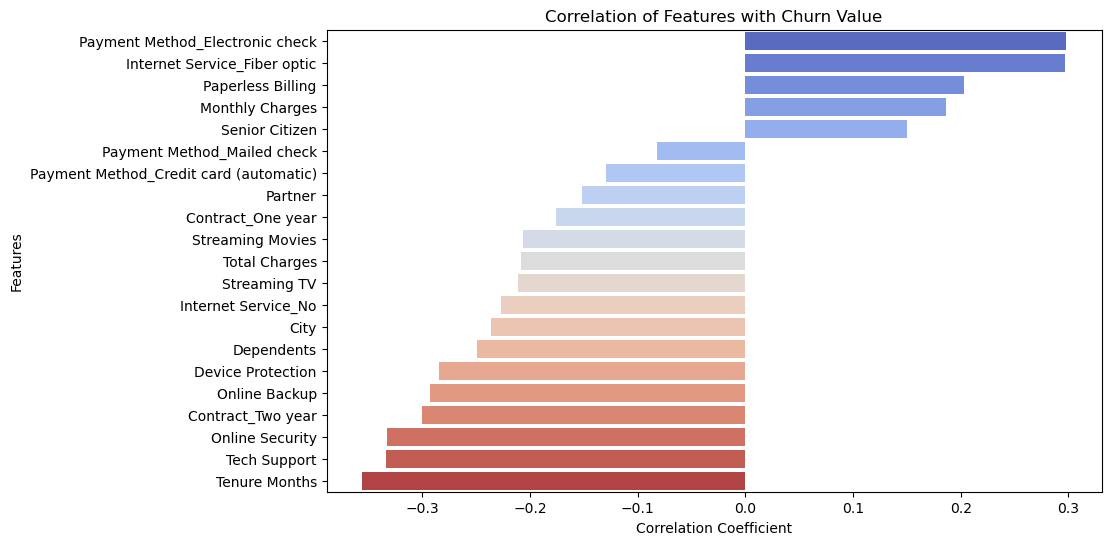

In [71]:
# Step 2: Visualise feature/target correlations
X_train['Churn Value'] = y_train

correlation_with_target = X_train.corr(numeric_only = True)['Churn Value'].drop('Churn Value').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlation of Features with Churn Value')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

X_train = X_train.drop(columns=['Churn Value'])

In [72]:
# Step 3: Scaling 

columns_to_scale = ['Monthly Charges', 'Total Charges']
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## 4.2 LR: Model Top 500

In [73]:
# Step 4: Fit the model

lr_recall = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=99)
lr_recall.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=99)

In [74]:
# Step 5: Predict probabilities, store each binary prediction in a column corresponding to its class
X_train[['active', 'churned']] = lr_recall.predict_proba(X_train)
X_train['y_pred'] = np.where(X_train['churned']>.3, 1, 0) # decision boundary of 0.3 to promote recall 

We selected a **decision boundary of 0.3**, as it provided a strong **recall score** whilst maintaining a reasonable accuracy.  

Lowering the threshold further would yield _marginal improvements in recall_, but at the cost of a more _significant decline in other key performance metrics_.

In [75]:
# Step 6: Evaluate model on test 

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = lr_recall.predict(X_test)
y_pred_proba = lr_recall.predict_proba(X_test)[:, 1]

# Print metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1202  347]
 [ 104  457]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1549
           1       0.57      0.81      0.67       561

    accuracy                           0.79      2110
   macro avg       0.74      0.80      0.76      2110
weighted avg       0.83      0.79      0.80      2110



In [76]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [77]:
# Step 7: Check Performance Metrics
get_results(y_train, X_train['y_pred'])

The confusion matrix for your predictions is:
[[2212 1402]
 [  99 1209]] 

The accuracy of your model is: 0.6950426655830964
The recall of your model is: 0.9243119266055045
The precision of your model is: 0.46304098046725395
The F1-score of your model is: 0.6169941311559071


In [78]:
# Step 8: Create list of Top 500 customers most likely to churn (from test set)

# Merge y_test (actual churn status) into X_test for clarity
X_test['actual_churn'] = y_test.values  # Add actual churn labels

# Predict probabilities for the feature set
X_test_clean = X_test[feature_cols] #extract feature columns from x_test
y_pred_proba = lr_recall.predict_proba(X_test_clean)[:, 1] #predict probabilities for test

# Add churn probabilities back to the original X_test
X_test['churn_probability'] = y_pred_proba

# Filter for actives (Churn Value = 0)
actual_churners = X_test[X_test['actual_churn'] == 0]

# Sort by predicted churn probability
top_500_atrisk = actual_churners.sort_values(by='churn_probability', ascending=False).head(500)

# Display the top 20 churners
top_500_atrisk.head(5)

,City,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual_churn,churn_probability
4927,153,1,1,0,7,0,0,0,0,1,1,1,0.806395,-0.728391,1,0,0,0,0,1,0,0,0.958704
4476,30,1,1,0,2,0,0,1,0,0,0,1,0.316112,-0.933415,1,0,0,0,0,1,0,0,0.950736
5570,1,1,0,0,14,0,0,0,0,1,1,1,1.025035,-0.434149,1,0,0,0,0,1,0,0,0.948994
2265,95,0,0,0,2,0,0,0,0,1,0,1,0.506594,-0.918281,1,0,0,0,0,1,0,0,0.939712
5279,262,1,0,0,4,0,0,1,0,1,1,1,0.996877,-0.809039,1,0,0,0,0,1,0,0,0.934137


In [79]:
# Step 9: Create list of Top 500 customers most likely to churn (from train set)

X_train['actual_churn'] = y_train.values  # Add actual churn labels

# Predict probabilities for the feature set
X_train_clean = X_train[feature_cols] #extract feature columns from x_test
y_pred_prob = lr_recall.predict_proba(X_train_clean)[:, 1] #predict probabilities for 

# Add churn probabilities back to the original X_train
X_train['churn_probability'] = y_pred_prob

# Filter for actives (Churn Value = 0)
actual_churners = X_train[X_train['actual_churn'] == 0]

# Sort by predicted churn probability
top_500_at_risk = actual_churners.sort_values(by='churn_probability', ascending=False).head(500)

# Display the top 20 churners
top_500_at_risk.head(5)

,City,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,active,churned,y_pred,actual_churn,churn_probability
5657,23,0,0,0,1,0,0,0,0,1,1,1,0.814677,-0.955818,1,0,0,0,0,1,0,0.040419,0.959581,1,0,0.959581
1889,0,1,1,0,2,0,0,1,0,1,1,1,1.021722,-0.915109,1,0,0,0,1,0,0,0.042504,0.957496,1,0,0.957496
4341,0,1,0,0,2,0,0,0,0,0,1,1,0.642415,-0.913170,1,0,0,0,0,1,0,0.044604,0.955396,1,0,0.955396
3273,34,0,0,0,3,0,0,0,0,1,1,1,0.905777,-0.877593,1,0,0,0,0,1,0,0.044624,0.955376,1,0,0.955376
2131,60,1,0,0,7,0,0,0,0,1,1,1,0.811364,-0.742093,1,0,0,0,0,1,0,0.045150,0.954850,1,0,0.954850


In [80]:
# Step 10: Concatenate the two DataFrames
combined_500 = pd.concat([top_500_atrisk, top_500_at_risk], axis=0)
top_500_final = combined_500.sort_values(by='churn_probability', ascending=False).head(500)

In [81]:
top_500_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 5657 to 2119
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    500 non-null    int64  
 1   Senior Citizen                          500 non-null    int64  
 2   Partner                                 500 non-null    int64  
 3   Dependents                              500 non-null    int64  
 4   Tenure Months                           500 non-null    int64  
 5   Online Security                         500 non-null    int64  
 6   Online Backup                           500 non-null    int64  
 7   Device Protection                       500 non-null    int64  
 8   Tech Support                            500 non-null    int64  
 9   Streaming TV                            500 non-null    int64  
 10  Streaming Movies                        500 non-null    int64  

In [82]:
top_500_final.head()

,City,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual_churn,churn_probability,active,churned,y_pred
5657,23,0,0,0,1,0,0,0,0,1,1,1,0.814677,-0.955818,1,0,0,0,0,1,0,0,0.959581,0.040419,0.959581,1.0
4927,153,1,1,0,7,0,0,0,0,1,1,1,0.806395,-0.728391,1,0,0,0,0,1,0,0,0.958704,NaN,NaN,NaN
1889,0,1,1,0,2,0,0,1,0,1,1,1,1.021722,-0.915109,1,0,0,0,1,0,0,0,0.957496,0.042504,0.957496,1.0
4341,0,1,0,0,2,0,0,0,0,0,1,1,0.642415,-0.913170,1,0,0,0,0,1,0,0,0.955396,0.044604,0.955396,1.0
3273,34,0,0,0,3,0,0,0,0,1,1,1,0.905777,-0.877593,1,0,0,0,0,1,0,0,0.955376,0.044624,0.955376,1.0


In [83]:
# Step 11: 

og_df = pd.read_excel("1 - Project Data.xlsx")

# Ensure CustomerID maps to the correct rows in top_500_final
# Reset index in both DataFrames to align them properly
top_500_final = top_500_final.reset_index()
og_df = og_df.reset_index()

# Merge CustomerID back into top_500_final using the index
top_500_with_id = top_500_final.merge(og_df[['CustomerID']], 
                                      left_index=True, 
                                      right_index=True)

# Select only CustomerID and churn_probability for the clean output
final_churn_df = top_500_with_id[['CustomerID', 'churn_probability']]

# Display the clean DataFrame
final_churn_df.head(10) # Show the top 10 for verification

,CustomerID,churn_probability
0,3668-QPYBK,0.959581
1,9237-HQITU,0.958704
2,9305-CDSKC,0.957496
3,7892-POOKP,0.955396
4,0280-XJGEX,0.955376
5,4190-MFLUW,0.954850
6,8779-QRDMV,0.950736
7,1066-JKSGK,0.948994
8,6467-CHFZW,0.947819
9,8665-UTDHZ,0.947521


In [84]:
final_churn_df.to_csv("Top 500 Churn Risk.csv", index=False)

In [85]:
final_churn_df.to_excel("final_churn_output.xlsx", index=False, engine="openpyxl")

# 5. Model 3: Logistic Regression - Customer Churn Risk

In this section, we evaluated multiple metrics to determine the _optimal decision boundary_ for accuracy.  

The metrics converged at a threshold of **0.6**, indicating it as the most balanced point for general accuracy.  

This approach assumes that, unlike the resource-constrained nature of the prior deliverable (focusing on the top 500 customers for targeted outreach), _optimal performance_ is the primary goal here.  

This assumption drove our decision to apply a distinct decision threshold. 

## 5.1 LR: Churn Total Feature Engineering

In [86]:
# Step 2: Feature Engineer & Train Test Split (data leakage avoided: no null-handling aggregations)
def feature_eng(df):

    # Drop rows where 'Total Charges' is missing or empty
    # We have 11 rows with empty Total Charges which we decided to drop rather than replace
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')  # Ensure 'Total Charges' is numeric
    df = df.dropna(subset=['Total Charges'])  # Drop rows with missing 'Total Charges'

    
    # Drop non-useful columns
    df = df.drop(columns = ['CustomerID', 
                            'Count', 
                            'Country',
                            'Zip Code',
                            'State', 
                            'Lat Long', 
                            'Latitude', 
                            'Longitude', 
                            'Churn Label',
                            'Churn Reason'],
                            axis = 1) # We already have Churn Value which is already a numerical 

    
    # Change yes/no(including: No internet/Phone services) to binary
    df['Senior Citizen'] = df['Senior Citizen'].apply(columns_binary)
    df['Partner'] = df['Partner'].apply(columns_binary)
    df['Dependents'] = df['Dependents'].apply(columns_binary)
    df['Phone Service'] = df['Phone Service'].apply(columns_binary)
    df['Paperless Billing'] = df['Paperless Billing'].apply(columns_binary)

    # Changing columns with only two results to numericals
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

    # Changing columns with 3 results to numericals
    df['Multiple Lines'] = df['Multiple Lines'].map({'No':0, 'Yes':1, 'No phone service':2})
    df['Online Security'] = df['Online Security'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Device Protection'] = df['Device Protection'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Online Backup'] = df['Online Backup'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Tech Support'] = df['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Streaming TV'] = df['Streaming TV'].map({'No':0, 'Yes':1, 'No internet service':2})
    df['Streaming Movies'] = df['Streaming Movies'].map({'No':0, 'Yes':1, 'No internet service':2})

    
    # OHE columns
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'Internet Service', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'Payment Method', dtype=int)

    # Map cities to unique integers
    city_mapping = {city: idx for idx, city in enumerate(df['City'].unique())}
    df['City'] = df['City'].map(city_mapping)

    return df


featured_df = feature_eng(df)


# Define feature columns for our predictions
feature_cols = ['City', 'Senior Citizen', 'Partner', 'Dependents',
               'Tenure Months', 'Online Security',
               'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
               'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
               'Total Charges', 'Internet Service_Fiber optic',
               'Internet Service_No', 'Contract_One year', 'Contract_Two year',
               'Payment Method_Credit card (automatic)',
               'Payment Method_Electronic check', 'Payment Method_Mailed check'
               ]


X_train, X_test, y_train, y_test = train_test_split(featured_df[feature_cols],
                                                   featured_df['Churn Value'],
                                                   test_size = 0.3,
                                                   random_state = 99,
                                                   stratify = featured_df['Churn Value'])


In [87]:
# Step 4: Scale some features

columns_to_scale = ['Monthly Charges', 'Total Charges']
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## 5.2 LR: Churn Total Model

In [88]:
# Step 5: Fit the model on training set 

lr_accuracy = LogisticRegression(class_weight='balanced', max_iter=5000, random_state=99)
lr_accuracy.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=99)

In [89]:
# Step 6: Find optimal decision boundary for F1 Score (> 0.7 = GOOD)

# Get predicted probabilities
y_pred_proba = lr_accuracy.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute F1 scores for all thresholds
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that gives the highest F1-score
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]}, Recall: {recall[optimal_idx]}, F1: {f1_scores[optimal_idx]}")

Optimal Threshold: 0.6034513027562534
Precision: 0.6466049382716049, Recall: 0.7468805704099821, F1: 0.6931348221670802


In [90]:
# Step 6: Find optimal decision boundary for ROC-AUC (0.7 to 0.8 = GOOD)
y_pred_proba = lr_accuracy.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Find the optimal threshold (e.g., Youden's J statistic = TPR - FPR)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"True Positive Rate: {tpr[optimal_idx]}, False Positive Rate: {fpr[optimal_idx]}")

Optimal Threshold: 0.5872715085126056
True Positive Rate: 0.7664884135472371, False Positive Rate: 0.1646223369916075


In [91]:
## Step 7: Predict probabilities, store each binary prediction in a column corresponding to its class
X_train[['active', 'churned']] = lr_accuracy.predict_proba(X_train)
X_train['y_pred'] = np.where(X_train['churned']>.6, 1, 0) # decision boundary reflecting optimal threshold 

In [92]:
# Step 8: Evaluate model on test 

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = lr_accuracy.predict(X_test)
y_pred_proba = lr_accuracy.predict_proba(X_test)[:, 1]

# Print metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1202  347]
 [ 104  457]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1549
           1       0.57      0.81      0.67       561

    accuracy                           0.79      2110
   macro avg       0.74      0.80      0.76      2110
weighted avg       0.83      0.79      0.80      2110



In [93]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [94]:
# Step 9: Check Performance Metrics
get_results(y_train, X_train['y_pred'])

The confusion matrix for your predictions is:
[[2966  648]
 [ 310  998]] 

The accuracy of your model is: 0.8053636733035352
The recall of your model is: 0.7629969418960245
The precision of your model is: 0.606318347509113
The F1-score of your model is: 0.6756939742721734


In [95]:
# Step 10: Create table of customer ids & their churn probabilities (test)

# Merge y_test (actual churn status) into X_test for clarity
X_test['actual_churn'] = y_test.values  # Add actual churn labels

# Predict probabilities for the feature set
X_test_clean = X_test[feature_cols] #extract feature columns from x_test
y_pred_proba = lr_accuracy.predict_proba(X_test_clean)[:, 1] #predict probabilities for test

# Add churn probabilities back to the original X_test
X_test['churn_probability'] = y_pred_proba

# Filter for actives (Churn Value = 0)
final_churner = X_test[X_test['actual_churn'] == 0]

final_churner

,City,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual_churn,churn_probability
3189,13,1,1,0,42,1,0,1,0,1,1,1,1.343056,1.031156,1,0,1,0,0,0,0,0,0.735324
3107,0,0,1,0,72,1,1,1,0,1,1,1,0.682168,1.684956,0,0,0,1,0,1,0,0,0.217330
2323,605,0,1,1,66,0,0,0,0,0,0,1,0.317768,1.145751,1,0,1,0,0,0,0,0,0.052023
6391,1008,0,1,1,50,2,2,2,2,2,2,1,-1.467790,-0.581457,0,1,1,0,0,0,1,0,0.006271
2793,665,1,1,0,55,0,0,1,1,1,0,0,0.799770,1.121982,1,0,0,1,1,0,0,0,0.105139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,716,0,1,0,67,0,1,1,1,1,1,1,-0.169202,0.812959,0,0,0,1,0,1,0,0,0.067128
3023,1097,0,1,0,72,0,1,1,0,1,1,1,0.355865,1.419352,0,0,0,1,0,0,0,0,0.029131
5521,1126,0,1,1,10,2,2,2,2,2,2,1,-1.333624,-0.883277,0,1,0,0,0,0,1,0,0.050955
5247,1032,0,0,0,58,2,2,2,2,2,2,0,-1.452882,-0.461046,0,1,0,1,0,0,1,0,0.005429


In [96]:
# Step 11: Create table of customer ids & their churn probabilities (train)

X_train['actual_churn'] = y_train.values  # Add actual churn labels

# Predict probabilities for the feature set
X_train_clean = X_train[feature_cols] #extract feature columns from x_test
y_pred_prob = lr_accuracy.predict_proba(X_train_clean)[:, 1] #predict probabilities for 

# Add churn probabilities back to the original X_train
X_train['churn_probability'] = y_pred_prob

# Filter for actives (Churn Value = 0)
total_churners = X_train[X_train['actual_churn'] == 0]

# Sort by predicted churn probability
total_churners.sort_values(by='churn_probability', ascending=False)

# Display the top 20 churners
total_churners.head(20)

,City,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,active,churned,y_pred,actual_churn,churn_probability
2742,1005,0,0,0,39,0,0,0,1,0,0,1,-0.492193,-0.126690,0,0,0,1,0,0,0,0.963597,0.036403,0,0,0.036403
5222,1022,0,1,1,56,0,1,0,1,1,0,1,1.069757,1.398182,1,0,0,0,1,0,0,0.943735,0.056265,0,0,0.056265
5506,336,0,1,0,64,1,0,1,1,1,1,1,1.452376,2.036429,1,0,1,0,0,0,1,0.650477,0.349523,0,0,0.349523
3494,894,0,0,0,69,0,0,1,1,1,1,0,1.303304,2.101481,1,0,0,1,0,1,0,0.934808,0.065192,0,0,0.065192
2563,175,0,0,0,16,0,1,0,0,0,0,0,0.345927,-0.460782,1,0,0,0,0,0,0,0.281381,0.718619,1,0,0.718619
5933,895,0,1,1,18,2,2,2,2,2,2,0,-1.500917,-0.858891,0,1,0,1,0,0,1,0.989983,0.010017,0,0,0.010017
6294,205,0,0,0,54,0,0,1,0,1,1,1,0.975344,1.234594,1,0,1,0,1,0,0,0.465704,0.534296,0,0,0.534296
5543,0,1,1,0,22,2,2,2,2,2,2,0,-1.293872,-0.753350,0,1,1,0,0,0,0,0.680027,0.319973,0,0,0.319973
5044,189,0,1,0,29,2,2,2,2,2,2,1,-1.494291,-0.765245,0,1,0,1,0,0,1,0.834558,0.165442,0,0,0.165442
6850,17,0,1,1,72,1,1,1,1,1,1,0,1.750521,2.824738,1,0,0,1,1,0,0,0.951923,0.048077,0,0,0.048077


In [97]:
# Step 11: Concatenate the two dataframes
final_table = pd.concat([total_churners, final_churner], axis=0)
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5163 entries, 2742 to 3153
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    5163 non-null   int64  
 1   Senior Citizen                          5163 non-null   int64  
 2   Partner                                 5163 non-null   int64  
 3   Dependents                              5163 non-null   int64  
 4   Tenure Months                           5163 non-null   int64  
 5   Online Security                         5163 non-null   int64  
 6   Online Backup                           5163 non-null   int64  
 7   Device Protection                       5163 non-null   int64  
 8   Tech Support                            5163 non-null   int64  
 9   Streaming TV                            5163 non-null   int64  
 10  Streaming Movies                        5163 non-null   int64 

In [98]:
total_churners.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3614 entries, 2742 to 5048
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    3614 non-null   int64  
 1   Senior Citizen                          3614 non-null   int64  
 2   Partner                                 3614 non-null   int64  
 3   Dependents                              3614 non-null   int64  
 4   Tenure Months                           3614 non-null   int64  
 5   Online Security                         3614 non-null   int64  
 6   Online Backup                           3614 non-null   int64  
 7   Device Protection                       3614 non-null   int64  
 8   Tech Support                            3614 non-null   int64  
 9   Streaming TV                            3614 non-null   int64  
 10  Streaming Movies                        3614 non-null   int64 

In [99]:
final_table.head()

,City,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,active,churned,y_pred,actual_churn,churn_probability
2742,1005,0,0,0,39,0,0,0,1,0,0,1,-0.492193,-0.126690,0,0,0,1,0,0,0,0.963597,0.036403,0.0,0,0.036403
5222,1022,0,1,1,56,0,1,0,1,1,0,1,1.069757,1.398182,1,0,0,0,1,0,0,0.943735,0.056265,0.0,0,0.056265
5506,336,0,1,0,64,1,0,1,1,1,1,1,1.452376,2.036429,1,0,1,0,0,0,1,0.650477,0.349523,0.0,0,0.349523
3494,894,0,0,0,69,0,0,1,1,1,1,0,1.303304,2.101481,1,0,0,1,0,1,0,0.934808,0.065192,0.0,0,0.065192
2563,175,0,0,0,16,0,1,0,0,0,0,0,0.345927,-0.460782,1,0,0,0,0,0,0,0.281381,0.718619,1.0,0,0.718619


In [100]:
# Step 12: Add Customer ID back in, reset index

og_df = pd.read_excel("1 - Project Data.xlsx")

# Reset index in both DataFrames to align them properly
final_table = final_table.reset_index()
og_df = og_df.reset_index()

# Merge CustomerID back into final table using the index
total_churners_with_id = final_table.merge(og_df[['CustomerID']], 
                                      left_index=True, 
                                      right_index=True)

# Select only CustomerID and churn_probability for a clean output
total_churners_df = total_churners_with_id[['CustomerID', 'churn_probability']]

# Display the clean DataFrame
total_churners_df.head(10) # Show the top 10 for verification

,CustomerID,churn_probability
0,3668-QPYBK,0.036403
1,9237-HQITU,0.056265
2,9305-CDSKC,0.349523
3,7892-POOKP,0.065192
4,0280-XJGEX,0.718619
5,4190-MFLUW,0.010017
6,8779-QRDMV,0.534296
7,1066-JKSGK,0.319973
8,6467-CHFZW,0.165442
9,8665-UTDHZ,0.048077


In [101]:
# Final: export tables to csv/excel 
total_churners_df.to_csv("Customer Churn Risk 2.csv", index=False)

In [102]:
total_churners_df.to_excel("Customer Churn Risk 2.xlsx", index=False, engine="openpyxl")

We applied the model to the **entire pool of customers who have not yet churned** and generated probabilities using our **optimised model**.  

The result is a table containing:  
- *Customer IDs*  
- Their respective *churn probabilities*  